# Table of Contents

- [Introduction](#section1)
- [Data Acquisition](#section2)
- [Data Preparation](#section3)
- [Data Analysis](#section4)
    - [The impact of Brexit on applications from EU citizens](#section5)
    - [The impact of expected Salaries of departments on applications and entrances](#section6)
    - [The impact of wealthines of countries on applications](#section7)
    - [The impact of Brexit on allocation of department recources](#section8)
- [Conclusion](#section9)
    - [Summary of main results](#section10)
    - [Discussion of Limitations to the analysis](#section11)
- [Discussion in light of other academic works](#section12)
- [References](#section13)



# Introduction <a id='section1'></a>

The aim of this project is to explore the effect of Brexit on LSE. Specifically we focus on the changed tuition fee structure that resulted from it as this is arguably one of the most tangible consequences of the referendum for LSE. Importantly this applies primarily to students from EU countries who now also have to pay overseas fees which are significantly higher than the home fees they paid previously. From here on out, we simply refer to this as the effect of Brexit unless otherwise stated.

To explore this effect, its implications will be decomposed into several research questions to examine aspects of the university where Brexit is likely to have had an effect. The following describes the exact areas of analysis:
 
Primarily, the number of applicants from EU countries will be examined to see if it has changed as the tuition fees for EU students have increased significantly due to Brexit. From this, the acceptance rate of EU students can be calculated on a departmental level to look for any changes there. This analysis will assess whether the difficulty of entry, and thus competitiveness, has remained consistent post-Brexit and if LSE continues to attract EU students, who now face higher costs. Since tuition fees have only changed for undergraduates, comparing the same data for postgraduates will serve as a control to see if the effect is only present for undergraduates.
 
Then, the effect of Brexit on the number of applicants and acceptance rates will be examined across departments, to see if this effect varies between departments with different average starting salaries. Here, the motivation is that for departments that typically had higher starting salaries, the decision of students to apply there was also financially motivated. Conversely, for students who applied to departments with typically lower starting salaries, the financial aspect was presumably less important. According to this logic, the effect of Brexit would be higher for departments with higher starting salaries. This analysis helps us understand the effect of Brexit more precisely on a departmental level and may indicate how LSE’s applicant pool has been affected by Brexit.

To further assess the impact of the changed tuition fee structure on application decisions of EU students we will also examine if there have been any notable trends that have varied with a country's wealth. The idea here is that the changed tuition fee structure affects applicants from poorer countries more greatly than from wealthier countries. This can help examine how the applicant pool, specifically of EU students, has changed for LSE following Brexit.
 
Finally, the effect of Brexit on individual departments will be analysed. The change in tuition fees for EU undergraduates will not only affect the students but also the various departments who collect these fees. Moreover, we can analyse how the additional collected tuition fees were allocated. For example, the research output can be examined to see whether this has perhaps increased for a department which now collected more tuition fees. This part can help break down the effect of Brexit on LSE within specific departments from a financial aspect but also in terms of examining whether the research of certain departments has improved, which is another important aspect of LSE.
 
These queries which the project aims to answer can be condensed into the following research questions:
 
1. Has the competitiveness and attractiveness of LSE to EU students changed following Brexit as these EU students are faced with increased tuition fees?
2. Does the impact of Brexit on applicant numbers and acceptance rates at LSE vary between departments with differing average starting salaries?
3. How does the effect of the changed tuition fee structure vary for EU applicants coming from countries of different wealth?
4. How have the changes in tuition fees for EU undergraduates post-Brexit affected the financial and academic aspects of individual departments at LSE?


# Data Acquisition <a id='section2'></a>

The data used to answer these questions comes from a variety of sources.
 
Primarily it comes from the LSE Planning Divison’s Tableau public which provides many statistics on LSE’s students. Specifically the “Department by Nationality” dataset from the tableau “LSE applications, offers and entrants” was used which provides breakdown of the number of applicants, offers and entrants from each nationality for all departments for the previous five academic years. From this source the number of applicants and acceptance rates per department were extracted and importantly compared to between years (to capture the effect of Brexit).
 
The second main source were the course websites of LSE itself. The starting point was the following website which contains an overview over all courses and the specific links to the websites of various course programs: https://www.lse.ac.uk/programmes/search-courses. These contain the general information for different programs. These were scraped to obtain the department name as well as the median salary 15 months after graduating.
 
Then for question 3 we required data for country's GDP. We decided to use the Worldbank's published data for this as they are a reliable source.

For question 4, in addition to the data we had already used for statistics on LSE's students we also required data on every department's research. We got this from LSE itself from the following website: https://eprints.lse.ac.uk/ which contains data for every department's research output. Moreover, we required data on the actual tuition fees by departments which we again got from a official LSE website.

 
Please see the jupyter notebook [Data Acquisition](Data_acquisition.ipynb) to see exactly how the data was acquired for each data source.

To access the sources directly where our data stemmed from, please refer to the [References](#section13).

# Data Preparation <a id='section3'></a>

Before performing the analysis, the data must be manipulated significantly so they are present in clean csv files or dataframes. As the data was extracted from various sources such as Tableau Public, Worldbank and different LSE websites (such course websites or eprints), data preparation for all datasets will be performed individually. 
 
Due to our data cleaning process being rather extensive we have decided not to include the code in this file. We thereby aim to improve readability. Please see the jupyter notebook [Data Preparation](Data_preparation.ipynb) to see exactly how each dataset was prepared. 

# Data Analysis <a id='section4'></a>

## Question 1 - The impact of Brexit on applications from EU citizens <a id='section5'></a>

Here we start with the data transformation, which proves to be essential when it comes to our analysis. In order to obtain the acceptance rate for every year we divide the number of offers by the number of applications in every row, thereby creating a new column for every year. We then proceed to do the same thing for the entrance rate. The columns are then summed up across countries and departments.

In [1]:
import pandas as pd
import csv


#Read the CSV file into a Pandas DataFrame
df = pd.read_csv("Data/data_table_cleaned.csv")

years = ['2019', '2020', '2021', '2022', '2023']

# Calculate acceptance rate and entrance rate for each year
for year in years:
    apps_col = f'Applications {year}'
    offers_col = f'Offers {year}'
    entrants_col = f'Entrances {year}'
    accept_rate_col = f'Acceptance Rate {year}'
    entrance_rate_col = f'Entrance Rate {year}'
    
    # Calculate acceptance rate: offers / applications
    df[accept_rate_col] = df[offers_col] / df[apps_col]
    
    # Calculate entrance rate: entrants / offers
    df[entrance_rate_col] = df[entrants_col] / df[offers_col]

df.to_csv("Data/data_table_cleaned_2.csv", index=False)


# Define the file paths, downloaded these csv files from GITHUB
eu_countries_file = "Data/EU-countries.csv"
nationalities_file = "Data/countries.csv"

# Initialize a set to store European nationalities
EU_nationalities = set()

# get EU countries from the CSV file
eu_countries = set()
with open(eu_countries_file, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # Skip header
    for row in reader:
        country_name = row[2].strip()  # country name is in first column
        eu_countries.add(country_name)

# Read the nationalities from the CSV file and filter European nationalities
with open(nationalities_file, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    next(reader) 
    for row in reader:
        country_name = row[3].strip()  # country name is in fourth column
        if country_name in eu_countries: 
            EU_nationalities.add(row[4])  # nationality is in fifth column
# check if all countries are there(should be 27)            
print(len(EU_nationalities))

#Now we change the CSV file with the acceptance rates so it oonly includes EU students

# Define the file paths
input_csv_file = "Data/data_table_cleaned_2.csv" 
output_csv_file = "Data/EU_students_acceptance_by_department.csv"  

# Open the input CSV file for reading and the output CSV file for writing
with open(input_csv_file, newline='', encoding='utf-8') as input_file, \
     open(output_csv_file, 'w', newline='', encoding='utf-8') as output_file:
    # Create CSV reader and writer objects
    reader = csv.reader(input_file)
    writer = csv.writer(output_file)

    # Read and write the first header row to the output file
    first_header = next(reader)
    writer.writerow(first_header)

    # Iterate over each row in the input CSV file
    for row in reader:
        # Check if the nationality in the first column is in the list of European nationalities
        if row[0].strip() in EU_nationalities:
            # Write the row to the output CSV file
            writer.writerow(row)



# Assuming 'df' is your main DataFrame with the applications, offers, and entrances data.
years = [2019, 2020, 2021, 2022, 2023]
summary_data = {'Year': [], 'Total_Applications': [], 'EU_Applications': [], 'Non-EU_Applications': [], 'Total_Acceptance_Rate': [], 'EU_Acceptance_Rate': [], 'Non-EU_Acceptance_Rate': []}

for year in years:
    apps_col = f'Applications {year}'
    offers_col = f'Offers {year}'
    
    # Total calculations
    total_apps = df[apps_col].sum()
    total_offers = df[offers_col].sum()
    total_acceptance_rate = total_offers / total_apps
    
    # EU calculations
    eu_apps = df[df['Nationality'].isin(EU_nationalities)][apps_col].sum()
    eu_offers = df[df['Nationality'].isin(EU_nationalities)][offers_col].sum()
    eu_acceptance_rate = eu_offers / eu_apps
    
    # Non-EU calculations
    non_eu_apps = df[~df['Nationality'].isin(EU_nationalities)][apps_col].sum()
    non_eu_offers = df[~df['Nationality'].isin(EU_nationalities)][offers_col].sum()
    non_eu_acceptance_rate = non_eu_offers / non_eu_apps
    
    summary_data['Year'].append(year)
    summary_data['Total_Applications'].append(total_apps)
    summary_data['EU_Applications'].append(eu_apps)
    summary_data['Non-EU_Applications'].append(non_eu_apps)
    summary_data['Total_Acceptance_Rate'].append(total_acceptance_rate)
    summary_data['EU_Acceptance_Rate'].append(eu_acceptance_rate)
    summary_data['Non-EU_Acceptance_Rate'].append(non_eu_acceptance_rate)

summary_df = pd.DataFrame(summary_data)
summary_df
            

27


Year  Total_Applications  EU_Applications  Non-EU_Applications  \
0  2019             49864.0           9536.0              40328.0   
1  2020             51341.5           9347.5              41994.0   
2  2021             55669.0           8628.5              47040.5   
3  2022             55427.5           8070.0              47357.5   
4  2023             55299.0           7679.0              47620.0   

   Total_Acceptance_Rate  EU_Acceptance_Rate  Non-EU_Acceptance_Rate  
0               0.277274            0.288853                0.274536  
1               0.304023            0.316448                0.301257  
2               0.247903            0.269688                0.243907  
3               0.268414            0.309727                0.261374  
4               0.267455            0.317359                0.259408

The resulting dataframe can now be used to visualize and interpret the data:

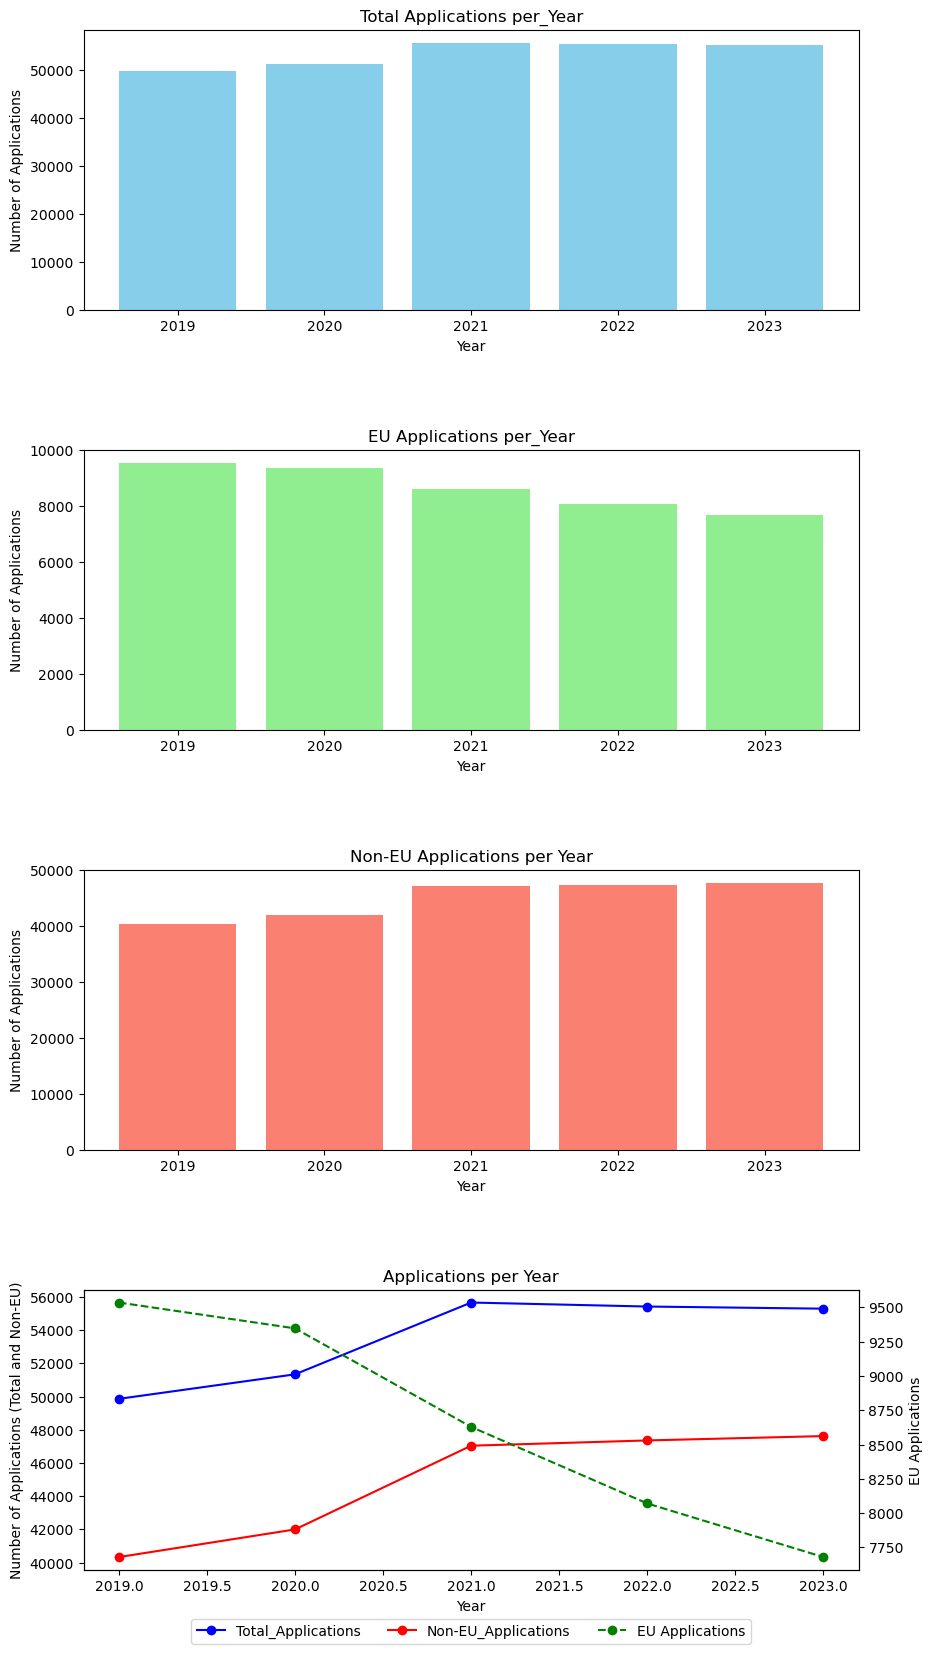

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame containing the summary data
# We first need to calculate the summary data based on your df after filtering
years = ['2019', '2020', '2021', '2022', '2023']
summary_data = {
    "Year": [],
    "Total_Applications": [],
    "EU_Applications": [],
    "Non-EU_Applications": []
}

# Sum applications per year for EU and Total applications
for year in years:
    apps_col = f'Applications {year}'
    summary_data["Year"].append(int(year))
    summary_data["EU_Applications"].append(df[df['Nationality'].isin(EU_nationalities)][apps_col].sum())
    summary_data["Total_Applications"].append(df[apps_col].sum())
    summary_data["Non-EU_Applications"].append(df[~df['Nationality'].isin(EU_nationalities)][apps_col].sum())

# Convert summary_data to DataFrame
summary_df = pd.DataFrame(summary_data)

# Set up the plots
fig, axes = plt.subplots(4, 1, figsize=(10, 20))
fig.subplots_adjust(hspace=0.5)

# Plot total applications per year with a bar chart
axes[0].bar(summary_df['Year'], summary_df['Total_Applications'], color='skyblue')
axes[0].set_title('Total Applications per_Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Applications')

# Plot EU applications per year with a bar chart
axes[1].bar(summary_df['Year'], summary_df['EU_Applications'], color='lightgreen')
axes[1].set_title('EU Applications per_Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Applications')

# Plot Non-EU applications per year with a bar chart
axes[2].bar(summary_df['Year'], summary_df['Non-EU_Applications'], color='salmon')
axes[2].set_title('Non-EU Applications per Year')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Number of Applications')

# Add a line chart for applications per year for all categories
axes[3].plot(summary_df['Year'], summary_df['Total_Applications'], label='Total_Applications', marker='o', linestyle='-', color='blue')
axes[3].plot(summary_df['Year'], summary_df['Non-EU_Applications'], label='Non-EU_Applications', marker='o', linestyle='-', color='red')

# EU uses the secondary y-axis
ax2 = axes[3].twinx()
ax2.plot(summary_df['Year'], summary_df['EU_Applications'], label='EU Applications', marker='o', linestyle='--', color='green')
ax2.set_ylabel('EU Applications')

axes[3].set_title('Applications per Year')
axes[3].set_xlabel('Year')
axes[3].set_ylabel('Number of Applications (Total and Non-EU)')

# Handling the legend: combining legends from both axes and placing them optimally
lines, labels = axes[3].get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.show()


The analysis of application trends at the London School of Economics (LSE) provides valuable insights into the institution's admissions landscape over a span of five years. The first figure, a bar chart representing total application numbers, showcases a nuanced trend. Application numbers steadily increased from 2019 to 2021, and plateaued around 55,000 annually from 2021 to 2023.

To gain deeper insights into the composition and drivers of these trends, two additional figures are examined. Figure 2 illustrates the total applications from individuals holding EU citizenship, while Figure 3 showcases applications from individuals originating from non-EU nations. Notably, UK applicants are categorized as non-EU in all analyses due to the dataset's classification criteria as of April 2024.

The impact of the Brexit referendum on application numbers becomes apparent when analyzing the trends. In 2021, a notable decline in applications is observed, particularly evident in Figure 1. This decline coincides with the announcement of changes in tuition fee structures post-Brexit, as prospective students became aware of the transition from EU to overseas tuition fees.

Further examination of Figures 2 and 3 reveals distinct trends among EU and non-EU applicants. Figure 2 shows an upward trajectory in total applicant numbers until 2021, followed by stagnation. Conversely, Figure 3 indicates a relatively smaller proportion of total applicants stemming from non-EU nations but exhibiting consistent growth over the years.

Despite the decline in EU applications after 2021, the relatively larger number of non-EU applicants contributes to the overall stability in total application numbers. To address the disproportionality in application trends, Figure 4 introduces a line plot with dual axes. This visualization aids in understanding the magnitude of the decline in EU applications relative to the broader applicant pool.

In conclusion, the analysis of application trends at LSE provides valuable insights into the impact of policy changes, demographic shifts, and geopolitical events on admissions dynamics. Specifically, these graphs support what was initially hpyothesised, that EU applications would decrease as a result of the changed tuition fee structure.

However, whilst this may imply that the university has become less competetitive for EU students as a result, the data also reveals that in total, considering both EU and non-EU students, applications have been rising. Therefore, despite fewer EU students applying, these students have to compete with more international students. Thus, if LSE does not distinguish candidates by their country of origin, then this means that overall competetiveness has increased for EU students (as total applicatins have increased).

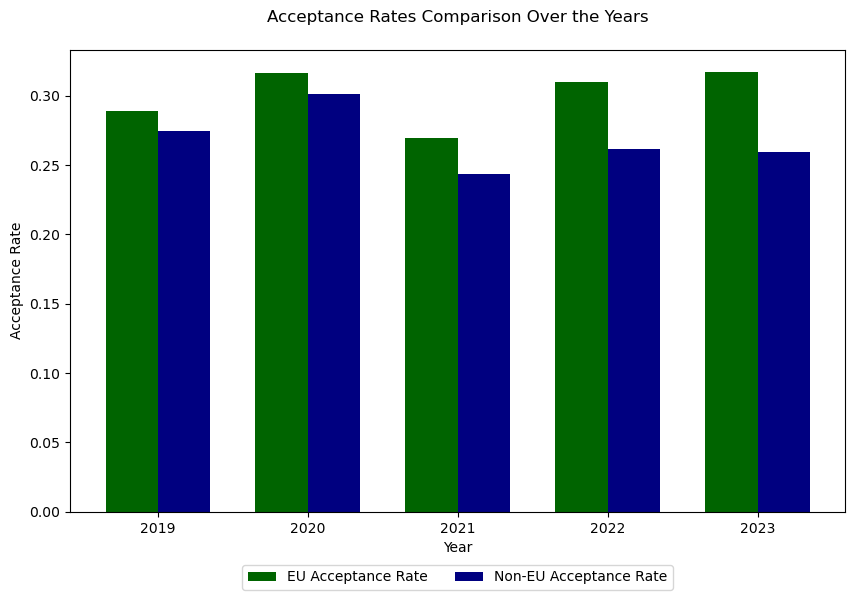

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# First, ensure that the acceptance rates are added to the summary_df DataFrame
# Assuming 'df' is your main DataFrame with the applications, offers, and entrances data.
years = [2019, 2020, 2021, 2022, 2023]
summary_data = {
    'Year': [],
    'Total_Applications': [],
    'EU_Applications': [],
    'Non-EU_Applications': [],
    'Total_Acceptance_Rate': [],
    'EU_Acceptance_Rate': [],
    'Non-EU_Acceptance_Rate': []
}

for year in years:
    apps_col = f'Applications {year}'
    offers_col = f'Offers {year}'
    
    # Total calculations
    total_apps = df[apps_col].sum()
    total_offers = df[offers_col].sum()
    total_acceptance_rate = total_offers / total_apps
    
    # EU calculations
    eu_apps = df[df['Nationality'].isin(EU_nationalities)][apps_col].sum()
    eu_offers = df[df['Nationality'].isin(EU_nationalities)][offers_col].sum()
    eu_acceptance_rate = eu_offers / eu_apps if eu_apps > 0 else 0  # Prevent division by zero
    
    # Non-EU calculations
    non_eu_apps = df[~df['Nationality'].isin(EU_nationalities)][apps_col].sum()
    non_eu_offers = df[~df['Nationality'].isin(EU_nationalities)][offers_col].sum()
    non_eu_acceptance_rate = non_eu_offers / non_eu_apps if non_eu_apps > 0 else 0  # Prevent division by zero
    
    summary_data['Year'].append(year)
    summary_data['Total_Applications'].append(total_apps)
    summary_data['EU_Applications'].append(eu_apps)
    summary_data['Non-EU_Applications'].append(non_eu_apps)
    summary_data['Total_Acceptance_Rate'].append(total_acceptance_rate)
    summary_data['EU_Acceptance_Rate'].append(eu_acceptance_rate)
    summary_data['Non-EU_Acceptance_Rate'].append(non_eu_acceptance_rate)

# Convert summary_data to DataFrame
summary_df = pd.DataFrame(summary_data)

# Now plot the acceptance rates
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35  # bar width
x = np.arange(len(years))  # the label locations

# Plotting the bars for EU and Non-EU acceptance rates
ax.bar(x - width/2, summary_df['EU_Acceptance_Rate'], width, label='EU Acceptance Rate', color='darkgreen')
ax.bar(x + width/2, summary_df['Non-EU_Acceptance_Rate'], width, label='Non-EU Acceptance Rate', color='navy')

ax.set_xlabel('Year')
ax.set_ylabel('Acceptance Rate')
ax.set_title('Acceptance Rates Comparison Over the Years', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(summary_df['Year'])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

plt.show()


# Analysis and interpretation of the acceptance rates over the years

The figure above presents a bar chart depicting the evolution of acceptance rates for applications from EU citizens compared to those from non-EU applicants. The y-axis represents the acceptance rate, while the x-axis denotes the year of the application process.

To derive these acceptance rates, calculations were performed on the dataset, dividing the number of offers extended by LSE to applicants from different countries by the corresponding number of applications received from each country. These countries were then categorized into EU and non-EU nations for comparative analysis. The chart yields two significant insights.

Firstly, it is apparent that applications originating from EU member states have a higher likelihood of receiving an offer compared to those from non-EU nations. While this observation may not be surprising given potential policy considerations or historical trends, the more notable finding emerges when analyzing the trend over the years. The disparity in acceptance rates between these two groups notably widens, particularly from the year 2021 onwards.

This finding intersects with the preceding analyses of application trends, specifically regarding the impact of the Brexit referendum. As observed, there was a decline in EU applicants post-Brexit induced changes in tutition fees, and an increased bias towards accepting EU students over non-EU counterparts, particularly evident in the acceptance rate data. This shift in bias can be interpreted as a strategic response by LSE to mitigate potential decreases in EU student enrollment.

The lag observed in the change of difference between acceptance rates suggests a measured and potentially reactionary approach by LSE policymakers. It is conceivable that the institution responded to the observed decline in EU student numbers post-Brexit by adjusting acceptance rates in subsequent years. This strategic response may have been motivated by various factors, including a desire to maintain or enhance campus diversity.

In summary, the visualised acceptance rates are indicative of the fact that LSE tries to maintain a diverse student body especially when this is affected by changes to the geopolitical landscape, here in the form of a changed tuition fee structure.

                            OLS Regression Results                            
Dep. Variable:        EU_Applications   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     181.5
Date:                Wed, 01 May 2024   Prob (F-statistic):             0.0545
Time:                        23:39:06   Log-Likelihood:                -24.197
No. Observations:                   5   AIC:                             56.39
Df Residuals:                       1   BIC:                             54.83
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         9159.0000    152.906  

/var/folders/w_/ccm86j116md1g5bmpdbhyv5r0000gn/T/ipykernel_6134/3671024450.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_brexit['Predicted_Applications'] = pre_brexit_model.predict(pre_brexit[['Time', 'Post_Brexit']])
/Users/maxijaeger/anaconda3/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


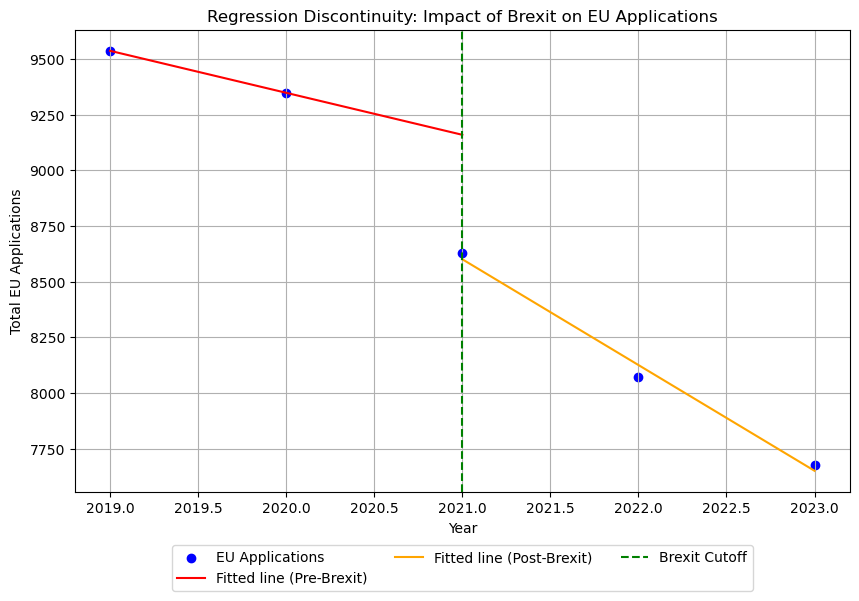

In [4]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Assuming summary_df is already defined and contains 'Year' and 'EU_Applications'
summary_df = summary_df.sort_values('Year')

summary_df['Time'] = summary_df['Year'] - 2021
summary_df['Post_Brexit'] = (summary_df['Year'] > 2020).astype(int)
formula = 'EU_Applications ~ Time + Post_Brexit + Time:Post_Brexit'

pre_brexit = summary_df[summary_df['Year'] <= 2020]
pre_brexit_model = smf.ols(formula, data=pre_brexit).fit()

# Use the pre-Brexit model to predict for the pre-Brexit data and the cutoff year.
pre_brexit['Predicted_Applications'] = pre_brexit_model.predict(pre_brexit[['Time', 'Post_Brexit']])
cutoff_prediction = pre_brexit_model.params['Intercept']  # The time is 0 at the cutoff, so this is just the intercept

# Append the prediction for the cutoff year to the pre-Brexit DataFrame.
cutoff_df = pd.DataFrame({'Year': [2021], 'Time': [0], 'Post_Brexit': [0], 'Predicted_Applications': [cutoff_prediction]})
pre_brexit_extended = pd.concat([pre_brexit, cutoff_df])

rdd_model = smf.ols(formula, data=summary_df).fit()

# Print the summary results from the regression discontinuity model
print(rdd_model.summary())

# Print the p-value for the Post_Brexit effect explicitly
p_value = rdd_model.pvalues['Post_Brexit']
print(f"The p-value for the Post_Brexit effect is: {p_value:.4f}")

# Create the scatter plot with the data points
plt.figure(figsize=(10, 6))
plt.scatter(summary_df['Year'], summary_df['EU_Applications'], color='blue', label='EU Applications')

# Plot the extended pre-Brexit fitted line up to the cutoff
plt.plot(pre_brexit_extended['Year'], pre_brexit_extended['Predicted_Applications'], color='red', label='Fitted line (Pre-Brexit)')

# Add the fitted line for post-Brexit
post_brexit = summary_df[summary_df['Year'] > 2020]
plt.plot(post_brexit['Year'], rdd_model.predict(post_brexit), color='orange', label='Fitted line (Post-Brexit)')

# Add the Brexit cutoff line
plt.axvline(x=2021, color='green', linestyle='--', label='Brexit Cutoff')

# Set the title and labels
plt.title('Regression Discontinuity: Impact of Brexit on EU Applications')
plt.xlabel('Year')
plt.ylabel('Total EU Applications')

# Adjust legend to prevent overlap
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.grid(True)
plt.show()


# Interpretation of the Regression discontinuity

In examining the impact of post-Brexit policies on the influx of EU student applicants, we consider the temporal dynamics surrounding the UK's referendum decision. With the referendum occurring on June 31, 2020, after the application cycle for 2020 had concluded, a pivotal shift in policy was set in motion. We operate under the assumption that applicants prior to this juncture were aware of their exemption from overseas fee obligations, while subsequent cohorts were confronted with this financial consideration.

Our analysis, anchored in a regression discontinuity framework, highlights the anticipated treatment effect materializing in 2021. Specifically, we observe an apparent decrease in the number of applications from EU students by approximately 560, a noteworthy shift. However, the statistical evaluation reveals a lack of robust evidence to support the hypothesis of a substantial effect. With a p-value hovering high above 10%, we are unable to confidently assert a departure from the status quo, even at a 10% significance level. This issue stems from the considerable standard errors inherent in our analysis, due to the constrained temporal scope of our dataset spanning merely the last five years.

Further analysing the data, we gain additional insights. Prior to Brexit, the average decline in applicants appears marginal, hovering around 190 per year. However, this trend fails to attain statistical significance. Notably, post-Brexit, the decline in applicants accelerates, with an estimated yearly decrease of approximately 480 (sum of beta1 and beta3) applications. Despite this apparent shift, the associated coefficient fails to breach the threshold of statistical significance.

PG Applications in 2020: 5096.5
PG Applications in 2022: 4482.5
UG Applications in 2020: 4251.0
UG Applications in 2022: 3587.5
Slope for PG trend: -307.0
Slope for UG trend: -331.75
Hypothetical UG Applications in 2022: 3637.0
DiD: -49.5


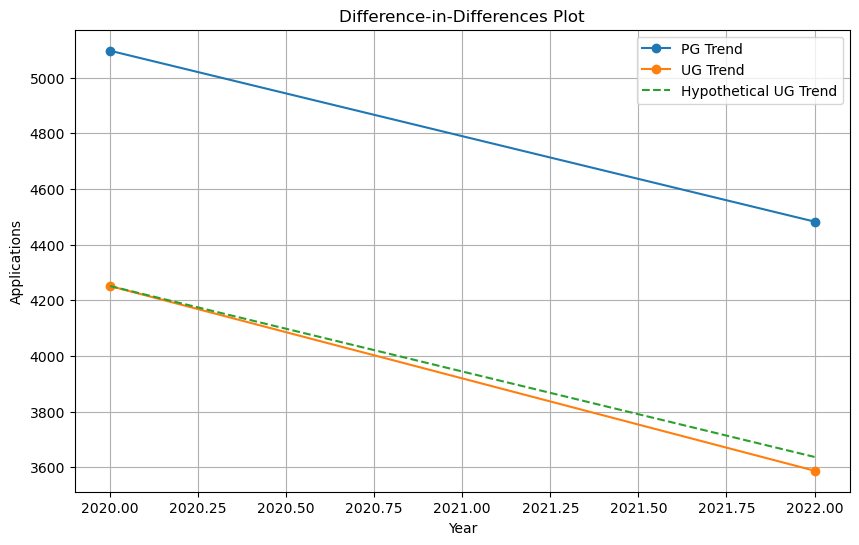

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from CSV
df = pd.read_csv("Data/EU_students_acceptance_by_department.csv")

# Filter data for relevant years and programs
pg_2020 = df[df['Program'].str.contains('PG')]['Applications 2020'].sum()
pg_2022 = df[df['Program'].str.contains('PG')]['Applications 2022'].sum()
ug_2020 = df[df['Program'].str.contains('UG')]['Applications 2020'].sum()
ug_2022 = df[df['Program'].str.contains('UG')]['Applications 2022'].sum()

# Calculate the slopes for PG and UG trends
pg_slope = (pg_2022 - pg_2020) / (2022 - 2020)
ug_slope = (ug_2022 - ug_2020) / (2022 - 2020)

# Calculate the hypothetical UG Applications in 2022
hypothetical_ug_2022 = ug_2020 + pg_slope*(2022 - 2020)

# Calculate the DiD
did = (ug_2022 - ug_2020) - (pg_2022 - pg_2020)

# Print the results
print("PG Applications in 2020:", pg_2020)
print("PG Applications in 2022:", pg_2022)
print("UG Applications in 2020:", ug_2020)
print("UG Applications in 2022:", ug_2022)
print("Slope for PG trend:", pg_slope)
print("Slope for UG trend:", ug_slope)
print("Hypothetical UG Applications in 2022:", hypothetical_ug_2022)
print("DiD:", did)

# Plotting
years = [2020, 2022]
pg_applications = [pg_2020, pg_2022]
ug_applications = [ug_2020, ug_2022]
hypothetical_ug_applications = [ug_2020, hypothetical_ug_2022]

plt.figure(figsize=(10, 6))

# Plot PG trend
plt.plot(years, pg_applications, marker='o', label='PG Trend')

# Plot UG trend
plt.plot(years, ug_applications, marker='o', label='UG Trend')

# Plot hypothetical UG trend
plt.plot(years, hypothetical_ug_applications, linestyle='--', label='Hypothetical UG Trend')

plt.title('Difference-in-Differences Plot')
plt.xlabel('Year')
plt.ylabel('Applications')
plt.legend()
plt.grid(True)
plt.show()


NON EU Applications in 2020: 41994.0
NON EU Applications in 2022: 47357.5
EU Applications in 2020: 9347.5
EU Applications in 2022: 8070.0
Slope for NON EU trend: 2681.75
Slope for EU trend: -638.75
Hypothetical EU Applications in 2022: 14711.0
DiD: -6641.0


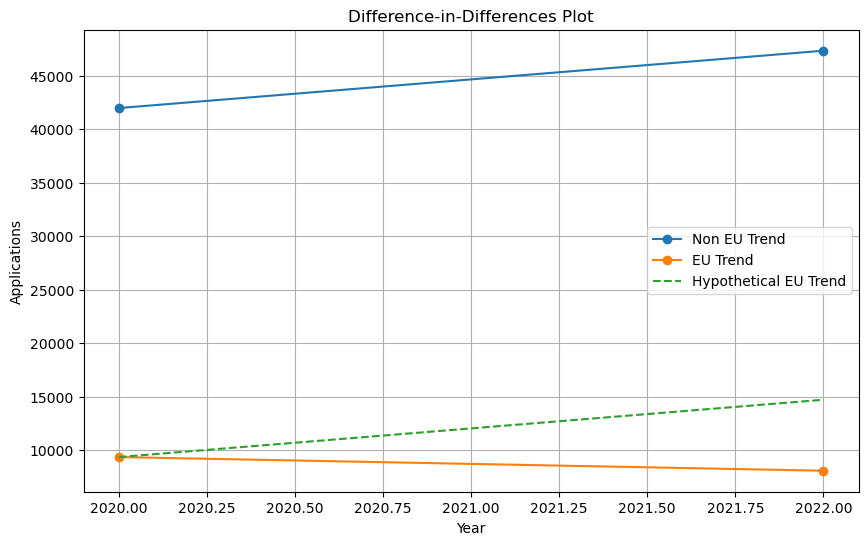

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for relevant years and programs
EU_2020 = summary_df.loc[1, 'EU_Applications']
EU_2022 = summary_df.loc[3, 'EU_Applications']
NON_EU_2020 = summary_df.loc[1, 'Non-EU_Applications']
NON_EU_2022 = summary_df.loc[3, 'Non-EU_Applications']

# Calculate the slopes for EU and NOn EU trends
EU_slope = (EU_2022 - EU_2020) / (2022 - 2020)
NON_EU_slope = (NON_EU_2022 - NON_EU_2020) / (2022 - 2020)

# Calculate the hypothetical EU Applications in 2022
hypothetical_EU_2022 = EU_2020 + NON_EU_slope*(2022 - 2020)

# Calculate the DiD
did = (EU_2022 - EU_2020) - (NON_EU_2022 - NON_EU_2020)

# Print the results
print("NON EU Applications in 2020:", NON_EU_2020)
print("NON EU Applications in 2022:", NON_EU_2022)
print("EU Applications in 2020:", EU_2020)
print("EU Applications in 2022:", EU_2022)
print("Slope for NON EU trend:", NON_EU_slope)
print("Slope for EU trend:", EU_slope)
print("Hypothetical EU Applications in 2022:", hypothetical_EU_2022)
print("DiD:", did)

# Plotting
years = [2020, 2022]
NON_EU_applications = [NON_EU_2020, NON_EU_2022]
EU_applications = [EU_2020, EU_2022]
hypothetical_EU_applications = [EU_2020, hypothetical_EU_2022]

plt.figure(figsize=(10, 6))

# Plot PG trend
plt.plot(years, NON_EU_applications, marker='o', label='Non EU Trend')

# Plot UG trend
plt.plot(years, EU_applications, marker='o', label='EU Trend')

# Plot hypothetical UG trend
plt.plot(years, hypothetical_EU_applications, linestyle='--', label='Hypothetical EU Trend')

plt.title('Difference-in-Differences Plot')
plt.xlabel('Year')
plt.ylabel('Applications')
plt.legend()
plt.grid(True)
plt.show()

## Interpretation of the Dif in Dif

Conducting a comprehensive analysis, we investigate the ramifications of Brexit policies on EU citizen applications using a Difference-in-Differences (Dif in Dif) approach. Our methodological framework involves the careful categorization of distinct study cohorts: the treated group comprises EU nationals, expected to be directly affected by the fee adjustments, while the control group consists of applicants from non-EU countries, presumed to be minimally impacted by the policy changes.

Our analysis focuses on the aggregate applications from both cohorts spanning the critical pre- and post-Brexit periods. Opting for 2021 as our post-Brexit reference year, we mitigate potential confounding factors arising from the disruptive effects of the COVID-19 pandemic, which may have influenced the 2020 application cycle.
Central to our analytical framework is the assumption that in the absence of Brexit-induced disruptions, EU student applications would have mirrored the trends observed among non-EU applicants. This premise is visually represented by the upward-sloping green line in our graphical depiction, serving as the theoretical benchmark. Comparing this theoretical trajectory to the actual application trends for EU (depicted by the downward-sloping orange line) and non-EU (illustrated by the upward-sloping blue line) applicants reveals noteworthy disparities.

Examination of the graph shows a divergence in application trends following Brexit. While the green line suggests a consistent rise in EU applications—a reflection of the hypothetical scenario—its counterparts exhibit divergent trajectories. Notably, the pronounced upward slopes of the blue line suggest heightened interest from non-EU applicants, contrasting with the downward trajectory observed among EU applicants.

Interpreting these findings, it becomes apparent that the changed tuition fee structure did indeed impact the total applications from EU nationals, resulting in a significant decline.


## Question 2 - The impact of expected Salaries of departments on applications <a id='section6'></a>

Using the cleaned output (see data preparation), we can begin visualizing the data to explore some of its insights:

Notably, departments were split into two groups based on the median salary (post-graduation). The threshold between high and low income departments was the actual median of the median salary values.Through this grouping, the analysis of the effect of brexit can be split between the two salary groups. 

To reiterate, the 2021 cohort was the first year group of EU students which now faced international fees, i.e., they are the first cohort to face significantly higher costs.


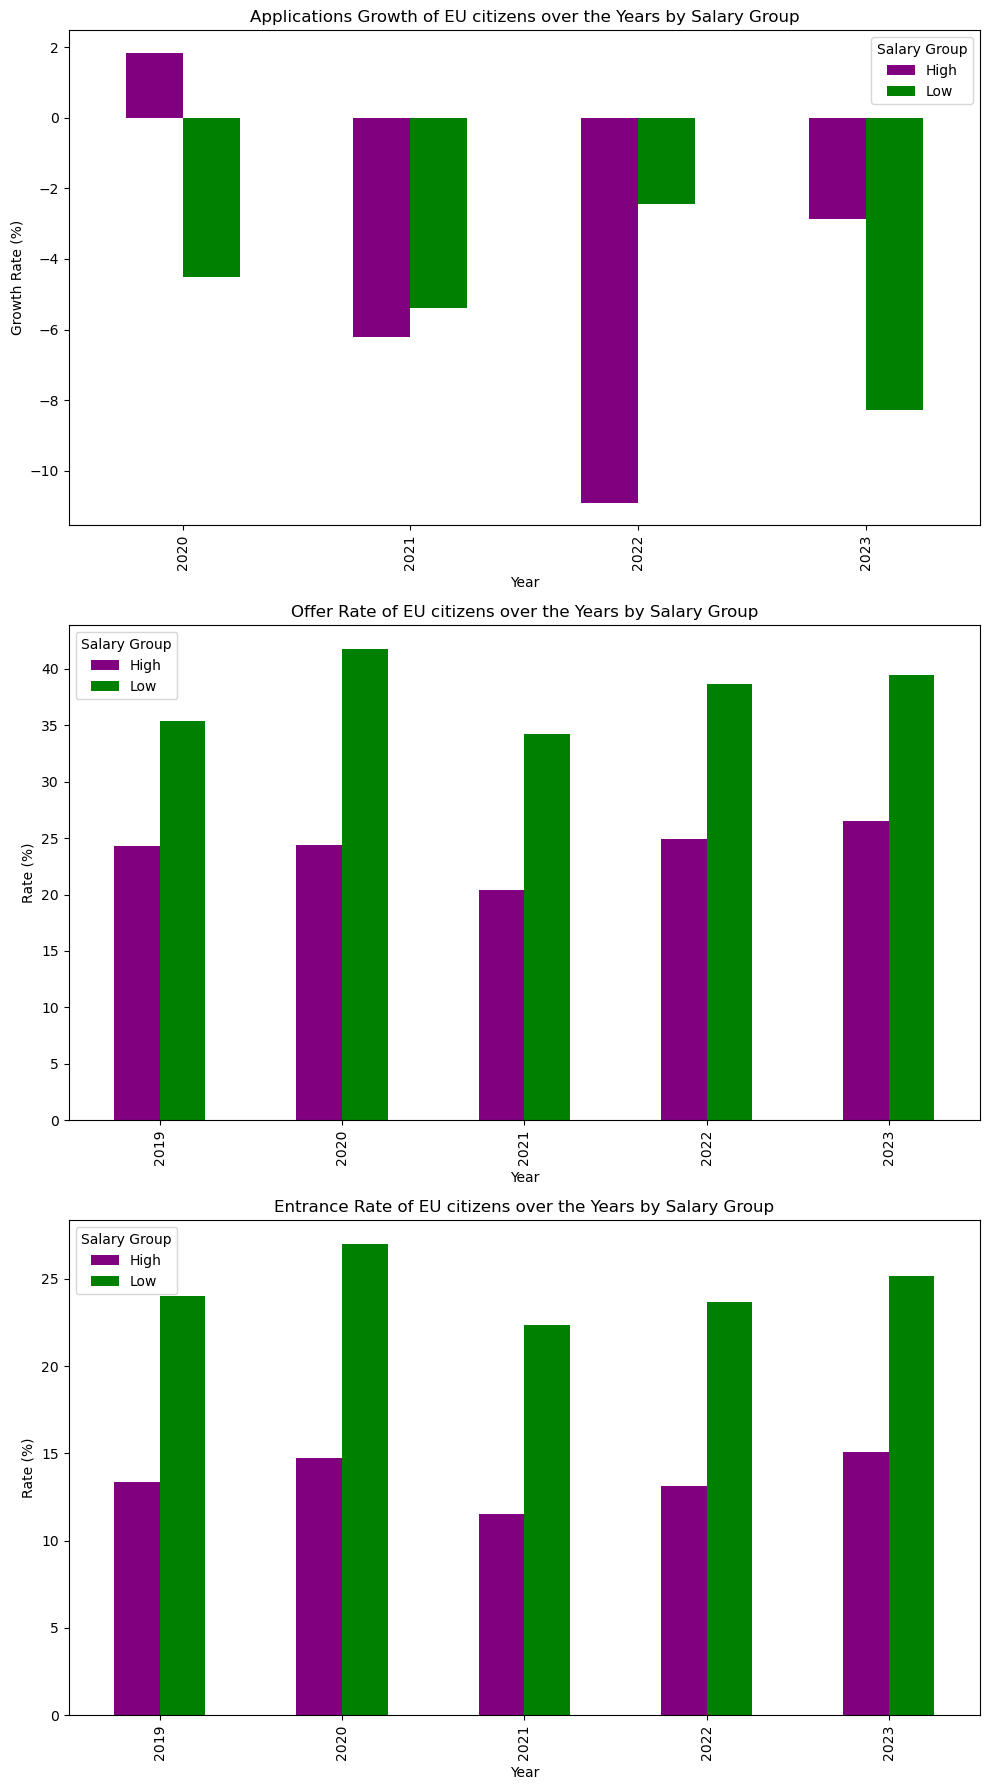

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Data/EU_data_cleaned.csv')

# Define the years to aggregate data over
years = ['2019', '2020', '2021', '2022', '2023']

# Prepare the aggregation for applications, offers, and entrances by year and salary group
agg_columns = []
for year in years:
    agg_columns.append((f'Applications {year}', pd.NamedAgg(column=f'Applications {year}', aggfunc='sum')))
    agg_columns.append((f'Offers {year}', pd.NamedAgg(column=f'Offers {year}', aggfunc='sum')))
    agg_columns.append((f'Entrances {year}', pd.NamedAgg(column=f'Entrances {year}', aggfunc='sum')))

agg_data = data.groupby('Salary Group').agg(**dict(agg_columns)).reset_index()

# Calculate offer and entrance rates as a percentage of applications
for year in years:
    agg_data[f'Offer Rate {year}'] = agg_data[f'Offers {year}'] / agg_data[f'Applications {year}'] * 100
    agg_data[f'Entrance Rate {year}'] = agg_data[f'Entrances {year}'] / agg_data[f'Applications {year}'] * 100

# Calculate growth rate of applications year-over-year for each salary group
for year in years[1:]:  # Start from 2020 to be able to calculate growth from 2019
    previous_year = str(int(year) - 1)
    agg_data[f'Applications Growth {year}'] = (
        (agg_data[f'Applications {year}'] - agg_data[f'Applications {previous_year}']) / agg_data[f'Applications {previous_year}']) * 100

# Prepare data for plotting growth rates
growth_columns = [f'Applications Growth {year}' for year in years[1:]]  # Exclude 2019 as there's no previous year data
melted_growth_data = agg_data.melt(id_vars=['Salary Group'], value_vars=growth_columns, var_name='Year_Type', value_name='Growth Rate')
melted_growth_data['Year'] = melted_growth_data['Year_Type'].str.extract('(\d+)').astype(int)
melted_growth_data['Type'] = 'Applications Growth'

# Reshape the rate data for plotting
rate_columns = [col for col in agg_data.columns if 'Rate' in col and 'Growth' not in col]
melted_rate_data = agg_data.melt(id_vars=['Salary Group'], value_vars=rate_columns, var_name='Year_Type', value_name='Rate')
melted_rate_data['Year'] = melted_rate_data['Year_Type'].str.extract('(\d+)').astype(int)
melted_rate_data['Type'] = melted_rate_data['Year_Type'].apply(lambda x: 'Offer Rate' if 'Offer Rate' in x else ('Entrance Rate' if 'Entrance Rate' in x else 'Applications'))

# Combine growth data with other rate data for plotting
combined_data = pd.concat([melted_growth_data, melted_rate_data])

# Plotting with applications growth rate
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 18))

# Plot settings
types = ['Applications Growth', 'Offer Rate', 'Entrance Rate']
colors = ['purple', 'green', 'red']
for ax, rate_type in zip(axes.flatten(), types):
    pivot_df = combined_data[combined_data['Type'] == rate_type].pivot(index='Year', columns='Salary Group', values='Growth Rate' if 'Growth' in rate_type else 'Rate')
    pivot_df.plot(kind='bar', ax=ax, color=colors)
    ax.set_title(f'{rate_type} of EU citizens over the Years by Salary Group')
    ax.set_ylabel('Growth Rate (%)' if 'Growth' in rate_type else 'Rate (%)')
    ax.set_xlabel('Year')

plt.tight_layout()
plt.show()

## Analysis of Offer and Entrance rate

From the 2nd and 3rd graph it is visible that both offer and etrance rates were rising in 2019 and 2020, then declined in 2021 but from then gradually started to recover since. This suggests LSE was more than usually competetive for the 2021 cohort which may be a result of the school reopening following covid in 2020 and presumably there was still much uncertainty regarding how teaching, exams, etc. were to be carried out that year. For example students who entered in 2021 still had winter exams online and some of the lectures were held purely online. This uncertainty may have caused LSE to admit a lower number of students than usually which may explain the lower offer rate.

This can be in fact verified as a lower acceptance rate. A lower acceptance rate, holding fixed how many students were admitted, would mean that more students have applied. However, as the number of applications of EU students declined for this year it does mean that LSE simply admitted less students this year.   

Therefore as Covid had such a significant impact on the university, especially for the 2021 cohort, it is hard to interpret the effect of Brexit via raised tuition fees for students from these graphs. Especially as the patterns displayed by both department groups is very similar so comparing the two departments does not reveal significant insights. Importantly, the effect of Brexit on the acceptance rate does not seem to be different between the two groups of departments.

Thus also the annual growth in applications was plotted to focus on the effect of increased tuition fees from 2021 onwards for EU students.

## Analysis of annual growth in applications

From the first graph it is visible that application growth rate from EU students for the high income departments was positive in the year before Brexit (2020), but from 2021 it is negative.  This makes sense as due to Brexit, EU students now pay significantly higher tuition fees, so they are less inclined to apply and this may explain why the application growth rate is negative from 2021 onwards. 

In comparison, the application growth rate for EU students for "low income" departments has been negative every year in the dataset and therefore may  have not been affected by the Brexit outcome. Especially as the growth rate in applications was already negative in the preceding year, which indicates that other factors may have been involved which also explain why for the low income departments the growth rate in applications has been negative every year. 

This alligns with what was briefly discussed in the introduction. EU Students which applied to departments with low incomes originally presumably have less financially motivated decisions, i.e., the financial aspect is less significant to them. Therefore, the effect of Brexit raising their tuition fees is less important for them which may explain why their growth rate in applications seem to be unaffected by the result. In fact their Year-on-Year growth rate is  actually higher in 2021 than 2020 which further underlines this point and again suggests that for these applicants there was perhaps a alternative factor which the data does not capture (although it is still negative).

Furthermore, the positive growth rate in 2020 for high-income departments could be attributed to students rushing to apply before the anticipated tuition hikes in 2021. This urgency seems less relevant for applicants to low-income departments, where the growth rate was already negative at that time.

Moreover, the consistent negative growth rate in low-income departments may also relate to Brexit, as the increased tuition fees might not be seen as a worthwhile investment, especially given the relatively lower financial return. This might explain why there was no surge in applications in 2020 for these departments, unlike their high-income counterparts.




Now to dive deeper into the effect of Brexit on the number of applicants across departments with different starting salaries, can run a regression of the difference in applications on median salary for the various departments (where salary data was available). 

Specifically the difference in applicants between years 2022 and 2020 was taken (i.e. number of applications for a department in 2022 minus number of applications for a department in 2020). This ensures that the covid year 2021 was not included.

In [35]:
import plotly.express as px
from sklearn.linear_model import LinearRegression

# Load the CSV files
file_eu_cleaned = pd.read_csv('Data/EU_data_cleaned.csv')
file_output = pd.read_csv('Data/cleaned_output_median_salary.csv')

# Filter for only undergraduate courses in the EU cleaned data
undergrad_eu_cleaned = file_eu_cleaned[file_eu_cleaned['Program'].str.contains("UG Degree")]

# Compute total applications for the years 2020 (pre-Brexit) and 2022 (post-Brexit)
pre_brexit_apps = undergrad_eu_cleaned.groupby('Department')['Applications 2020'].sum()
post_brexit_apps = undergrad_eu_cleaned.groupby('Department')['Applications 2022'].sum()

# Calculate the difference in applications
application_difference = post_brexit_apps - pre_brexit_apps

# Get the median salary for each department from the second file, ensuring to match only undergraduate departments
median_salaries = file_output[file_output['Course Name'].str.contains("BSc")].groupby('Department')['Median Salary'].median()

# Join the application difference and median salary dataframes
department_data = pd.DataFrame({
    'Median Salary': median_salaries,
    'Application Difference': application_difference,
    'Total Pre-Brexit Applications': pre_brexit_apps,
    'Total Post-Brexit Applications': post_brexit_apps
}).dropna()

# Add department names for plotting
department_data['Department'] = department_data.index

# Perform linear regression
X = department_data['Median Salary'].values.reshape(-1, 1)
y = department_data['Application Difference'].values
model = LinearRegression()
model.fit(X, y)

# Predictions for the line
department_data['Predicted Difference'] = model.predict(X)

# Create the interactive plot
fig = px.scatter(department_data, x='Median Salary', y='Application Difference', trendline='ols',
                 labels={
                     'Median Salary': 'Median Salary (£)',
                     'Application Difference': 'Difference in Total Applications (2023 vs 2019)'
                 },
                 hover_data=['Department', 'Total Pre-Brexit Applications', 'Total Post-Brexit Applications'],
                 title='Interactive Plot: Median Salary vs. Application Difference Post vs Pre Brexit for Undergraduate Courses')
fig.update_traces(marker=dict(size=8),
                  selector=dict(mode='markers'))
fig.show()

In [34]:
import pandas as pd
import statsmodels.api as sm

# Load the CSV files
file_eu_cleaned = pd.read_csv('Data/EU_data_cleaned.csv')
file_output = pd.read_csv('Data/cleaned_output_median_salary.csv')

# Filter for only undergraduate courses in the EU cleaned data
undergrad_eu_cleaned = file_eu_cleaned[file_eu_cleaned['Program'].str.contains("UG Degree")]

# Compute total applications for the years 2020 (pre-Brexit) and 2022 (post-Brexit)
pre_brexit_apps = undergrad_eu_cleaned.groupby('Department')['Applications 2020'].sum()
post_brexit_apps = undergrad_eu_cleaned.groupby('Department')['Applications 2022'].sum()

# Calculate the difference in applications
application_difference = post_brexit_apps - pre_brexit_apps

# Get the median salary for each department from the second file, ensuring to match only undergraduate departments
median_salaries = file_output[file_output['Course Name'].str.contains("BSc")].groupby('Department')['Median Salary'].median()

# Join the application difference and median salary dataframes
department_data = pd.DataFrame({
    'Median Salary': median_salaries,
    'Application Difference': application_difference,
    'Total Pre-Brexit Applications': pre_brexit_apps,
    'Total Post-Brexit Applications': post_brexit_apps
}).dropna()

# Add department names for indexing
department_data['Department'] = department_data.index

# Set up the X and y matrices for the regression, with an intercept added to X
X = department_data[['Median Salary']]
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = department_data['Application Difference']

# Fit the model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression
print(results.summary())


                              OLS Regression Results                              
Dep. Variable:     Application Difference   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                 -0.100
Method:                     Least Squares   F-statistic:                 0.0002714
Date:                    Wed, 01 May 2024   Prob (F-statistic):              0.987
Time:                            23:59:43   Log-Likelihood:                -93.127
No. Observations:                      12   AIC:                             190.3
Df Residuals:                          10   BIC:                             191.2
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const 

/Users/maxijaeger/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=12



## Interpretation of the OLS

Here, we analyse the relationship between two key variables: the difference in total applications from EU students across academic departments from 2020 to 2022, and the median salary earned by graduates of those departments after completing their studies. Each data point on our graph represents a distinct academic department, with the change in EU student applications plotted on the y-axis and the median salary of graduates on the x-axis.

Our primary question is whether the expected wage advertised by academic departments influences the decision-making process of applicants, particularly in light of the Brexit referendum and subsequent tuition fee adjustments for EU students. From a financial perspective, we conceptualize further education as an investment, with the net present value of this investment comprising the upfront costs (i.e., tuition fees) and the anticipated future returns in the form of expected salaries.

Higher tuition fees may prompt students to apply to more financially lucrative departments, opting for degrees associated with higher projected earnings. This rationale gains becomes important when considering students' long-term income prospects. Some EU students may even resort to student loans, the repayment burden of which naturally increases with raised tuition fees. However, a higher expected salary can potentially alleviate the financial strain associated with loan repayment.

However, unfortunately the OLS regression did not yield any further insights to the discussion above. Primarily, the slope is essentially flat (with a minimally positive coefficient) and therefore there seems to be no correlation between median salary and the difference in applicants for the departments. This is further underlined by a extremely high and thus insignificant p-value.

Thus, this does not contribute any insights to our prior analysis which supported our hypothesis that the effect of the changed tuition fee structure would be more important for students who applied to typically higher salary paying departments.

## Question 3 - The impact of a country's wealth on applications and entrances <a id='section7'></a>

In [10]:
import pandas as pd
import plotly.express as px
import statsmodels.api as sm
import plotly.graph_objects as go

# Load the data
#file_path = 'Data/merged_data_with_students.csv'
merged_data = pd.read_csv('Data/merged_data_with_students.csv')

# Group by country and sum the applications for 2020 and 2022
country_totals = merged_data.groupby('Country').agg({'Applications 2020': 'sum', 'Applications 2022': 'sum', 'GDP per Capita': 'first'})

# Calculate the difference between applications in 2022 and 2020 for each country
country_totals['Difference'] = country_totals['Applications 2022'] - country_totals['Applications 2020']

# Reset index to make 'Country' a regular column
country_totals.reset_index(inplace=True)

# Plotting using Plotly Express
fig = px.scatter(country_totals, x='GDP per Capita', y='Difference', title='Difference in Applications between 2022 and 2020 by GDP per Capita',
                 labels={'Difference': 'Difference in Applications', 'GDP per Capita': 'GDP per Capita in USD'}, hover_name='Country')

# Add OLS regression line
x = sm.add_constant(country_totals['GDP per Capita'])
model = sm.OLS(country_totals['Difference'], x).fit()
fig.add_traces(go.Scatter(x=country_totals['GDP per Capita'], y=model.predict(), mode='lines', name='OLS Regression'))

# Show the plot
fig.show()


## Interpretation of the Scatter Plot

We now take a look at individual countries from the European Union. We want to find out in what way their characteristics play a role in the influence of the changed tuition fee structure on the applicants of LSE. 

If, in fact, higher tuition fees play a role in the financial decision-making process of applicants, it is likely that we see a bigger decline in applicants in poorer countries. The figure above plots the GDP per capita of EU member states against the difference in applications. We use GDP per capita instead of GDP as it speaks better to the financial backgrounds and incentives of potential applicants. The difference in applications is a metric which we calculate by summing all applications of said country from 2022 and subtracting all applications from 2020. We thus receive the increase or decrease in applicants over Brexit. Note that our analysis again skips the year 2021 in order to exclude the COVID-19 pandemic as a possible confounder. Every data point in the plot represents one country. 

Fitting an OLS line through the data reveals indeed a slight positive correlation between GDP per capita and the difference in applications. This means that countries with a higher GDP per capita on average experienced a smaller decline in applications from their citizens to LSE. This could indeed be due to insufficient financial funds. We must also consider here that poorer applicants are probably more likely to receive a scholarship, leading our estimate to be biased downward. This means that excluding the possibilities of scholarships, we would see an even steeper decline in applications from poorer countries if fees are raised.

This supports the idea that the changed tuition fee structure has a greater impact on poorer countries as students from there are less likely to be able to pay the higher tuition fees. As a result, LSE might lose some applications from these countries. This also relates to question 1 which considered whether LSE's attractiveness has changed for EU students with the idea that this has decreased and more notably for poorer countries.
Now to visualize the data on a more aggregate level we group the countries according to their wealth and then examine the application pattern across both groups.


This following code processes data from the merged file, aiming to further analyze application trends between wealthier and less wealthy countries in the EU over the years. First, it sorts the countries by GDP per capita in descending order. Then, it calculates the total population and identifies the point where the cumulative population crosses half of the total population, dividing countries into richer and poorer halves. Next, it initializes variables to store total applications for wealthy countries and their counterparts for each year and iterates over the years. For each year, it calculates the sum of applications for both richer and poorer countries and stores the totals. Finally, it computes the average applications across years for both richer and poorer countries.

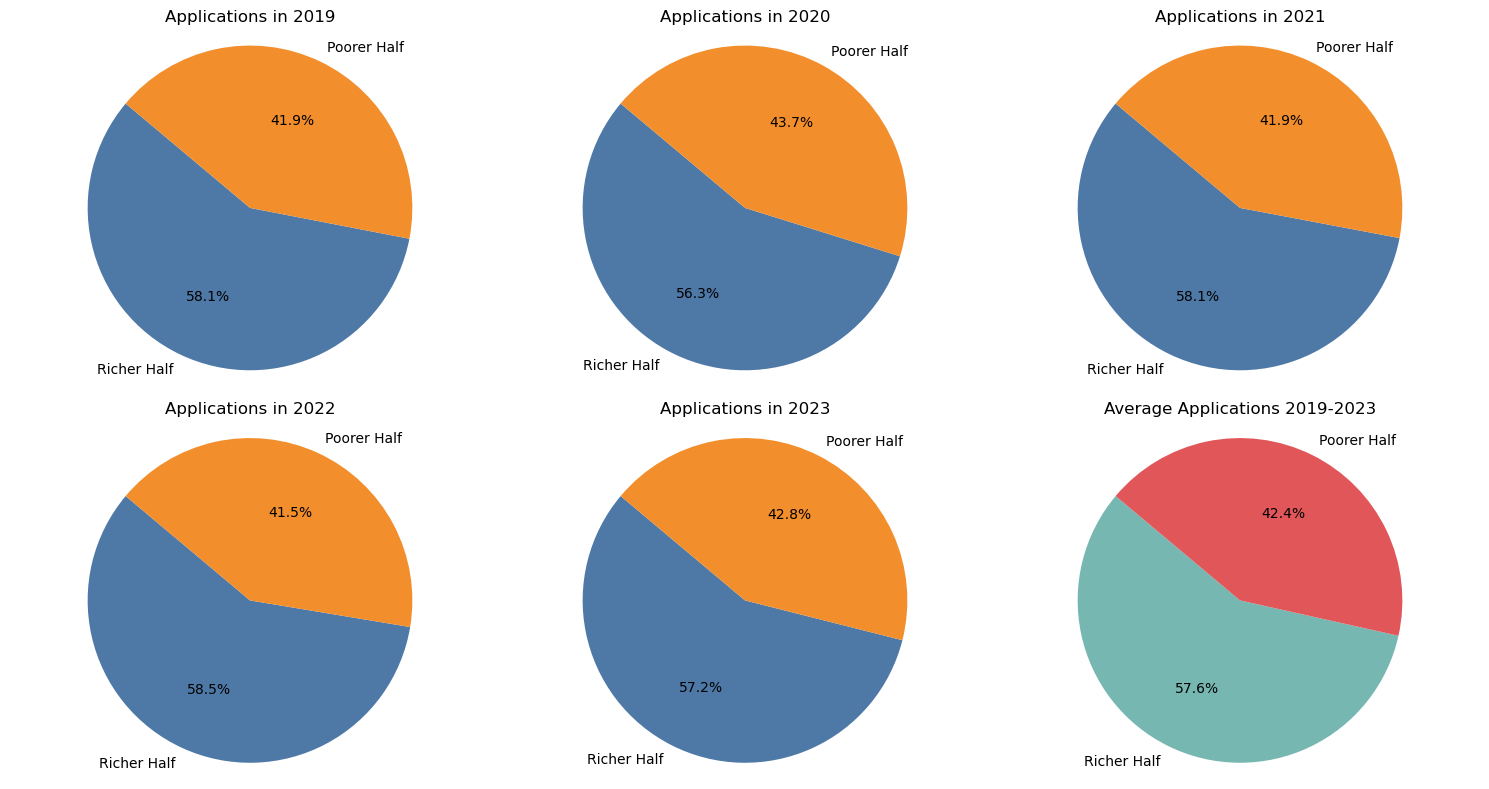

In [11]:
import pandas as pd

# Load the data
file_path = 'Data/merged_data_with_students.csv'
merged_data = pd.read_csv(file_path)

# Sort the countries by GDP per capita in descending order
sorted_data = merged_data.sort_values(by='GDP per Capita', ascending=False)

# Calculate the total population
total_population = sorted_data['Population'].sum()

# Find the index where the cumulative population crosses half of the total population
half_population = total_population / 2
cumulative_population = 0
rich_countries_set = set()
poor_countries_set = set()

for index, row in sorted_data.iterrows():
    cumulative_population += row['Population']
    if cumulative_population >= half_population:
        break
    rich_countries_set.add(row['Country'])

# Poorer half countries
poor_countries_set = set(sorted_data[~sorted_data['Country'].isin(rich_countries_set)]['Country'])

# Convert sets to lists
rich_countries = list(rich_countries_set)
poor_countries = list(poor_countries_set)

import matplotlib.pyplot as plt

# Initialize variables to store total applications for rich and poor countries for each year
rich_total_applications = {}
poor_total_applications = {}

# Iterate over each year
for year in range(2019, 2024):
    rich_sum = 0
    poor_sum = 0
    
    # Iterate over richer half countries
    for country in rich_countries:
        # Filter data for the current country and year
        country_data = merged_data[(merged_data['Country'] == country)]
        
        # Add the applications for the current country and year to the sum
        rich_sum += country_data[f'Applications {year}'].sum()
    
    # Iterate over poorer half countries
    for country in poor_countries:
        # Filter data for the current country and year
        country_data = merged_data[(merged_data['Country'] == country)]
        
        # Add the applications for the current country and year to the sum
        poor_sum += country_data[f'Applications {year}'].sum()
    
    # Store the total applications for the current year
    rich_total_applications[year] = rich_sum
    poor_total_applications[year] = poor_sum

# Calculate the average applications across years
avg_rich_applications = sum(rich_total_applications.values()) / len(rich_total_applications)
avg_poor_applications = sum(poor_total_applications.values()) / len(poor_total_applications)

# Plotting pie charts for each year plus the average
fig, axs = plt.subplots(2, 3, figsize=(15, 8))  # Adjust layout to fit the new pie chart

# Color palette for the first five charts
colors = ['#4e79a7', '#f28e2b']  # A set of professional, subdued colors

# Color palette for the average chart
avg_colors = ['#76b7b2', '#e15759']  # Different colors to distinguish from the annual data

# Iterate over each year for the first five pie charts
for i, year in enumerate(range(2019, 2024)):
    # Data for the current year
    rich_applications = rich_total_applications[year]
    poor_applications = poor_total_applications[year]
    
    # Labels for the pie chart
    labels = ['Richer Half', 'Poorer Half']
    
    # Sizes for the pie chart
    sizes = [rich_applications, poor_applications]
    
    # Plotting the pie chart
    row = i // 3
    col = i % 3
    axs[row, col].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    axs[row, col].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    axs[row, col].set_title(f'Applications in {year}')

# Adding the pie chart for the average applications
sizes_avg = [avg_rich_applications, avg_poor_applications]
axs[1, 2].pie(sizes_avg, labels=labels, autopct='%1.1f%%', startangle=140, colors=avg_colors)
axs[1, 2].axis('equal')
axs[1, 2].set_title('Average Applications 2019-2023')

# Show the pie charts
plt.tight_layout()
plt.show()


## Analysis of pie charts

As already mentioned previously, in this analysis, we split the population of the European Union into two halves based on GDP per capita: one comprising countries with higher GDP per capita and the other their counterparts. Both groups are of roughly equal size in terms of population and would ideally yield a comparable number of applicants were it not for the economic disparities among their respective countries. Our objective is to discern whether there exists a general effect attributable to wealthiness and whether there is an effect stemming from Brexit.

Initially, it is apparent that the "Wealthier Half" accounts for a higher proportion of applications, hovering around 58 percent. However, there is no discernible trend in these percentages over the past five years. While lacking a clear trajectory, this figure furnishes valuable insights that inform the interpretation of our data. Specifically, it underscores that the half of the population originating from wealthier EU countries yields a greater number of applicants. Consequently, this observation strongly suggests that financial considerations significantly influence application decisions. Nevertheless, it is important to acknowledge the presence of numerous confounding factors that complicate this interpretation.

For instance, wealthier countries may boast superior education systems on average, thereby increasing the likelihood of their citizens applying to prestigious foreign universities such as LSE. Additionally, as mentioned previously, the issue of scholarships introduces a downward bias to our estimates, further complicating the analysis.

Even though the trend is not visually obvious, these graphs can be argued to further support the idea that applicants from wealther countries are less affected by the changed tuition fee structure.

In [12]:
import pandas as pd
import plotly.express as px
import statsmodels.api as sm
import plotly.graph_objects as go

# Group by country and sum the applications for 2020 and 2022
country_totals = merged_data.groupby('Country').agg({'Entrances 2020': 'sum', 'Entrances 2022': 'sum', 'GDP per Capita': 'first'})

# Calculate the difference between applications in 2022 and 2020 for each country
country_totals['Difference'] = country_totals['Entrances 2022'] - country_totals['Entrances 2020']

# Reset index to make 'Country' a regular column
country_totals.reset_index(inplace=True)

# Plotting using Plotly Express
fig = px.scatter(country_totals, x='GDP per Capita', y='Difference', title='Difference in Applications between 2022 and 2020 by GDP per Capita',
                 labels={'Difference': 'Difference in Entrances)', 'GDP per Capita': 'GDP per Capita in USD'}, hover_name='Country')

# Add OLS regression line
x = sm.add_constant(country_totals['GDP per Capita'])
model = sm.OLS(country_totals['Difference'], x).fit()
fig.add_traces(go.Scatter(x=country_totals['GDP per Capita'], y=model.predict(), mode='lines', name='OLS Regression'))

# Show the plot
fig.show()

## Interpretation of the scatter plot

To shift our focus from applications to admissions, we've aggregated the entrance data for all EU countries in 2020 and 2022. By subtracting the total entrances in 2020 from those in 2022, we've created a preliminary measure of the impact of Brexit on admissions of EU students to LSE. We then juxtaposed this metric against the GDP per capita of each country through a scatter plot, with each point representing a country. Additionally, we fitted an Ordinary Least Squares (OLS) line through the data points to discern any underlying trend.

The resulting plot reveals a slight positive correlation between a country's GDP per capita and the change in entrances to LSE over the two years. This suggests that, on average, countries with lower GDP per capita experienced a greater decrease in entrants. Notably, we excluded the year 2021 from our analysis to mitigate any potential confounding effects due to the COVID-19 pandemic.

While this analysis doesn't directly address the motivations of applicants, as LSE's admissions policies play a significant role in determining entrance numbers, it does shed light on the potential impact of Brexit on the university. On one hand, there's a discernible decline in the number of EU nationals entering LSE. On the other hand, there's a noteworthy trend indicating that the decrease in students from less affluent EU nations surpassed that of wealthier ones over the two-year period.



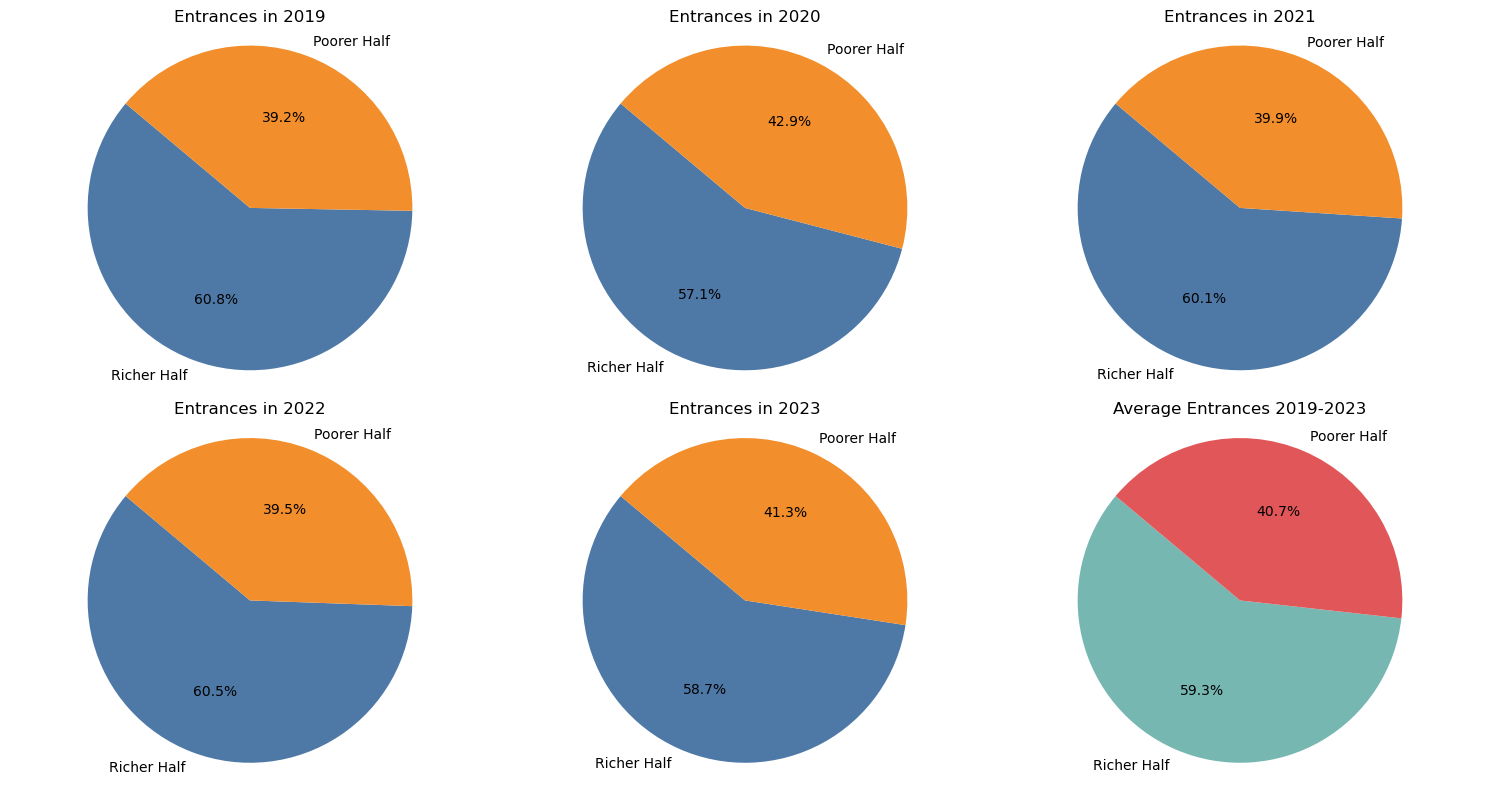

In [13]:
import matplotlib.pyplot as plt

# Initialize variables to store total entrances for rich and poor countries for each year
rich_total_entrances = {}
poor_total_entrances = {}

# Iterate over each year
for year in range(2019, 2024):
    rich_sum = 0
    poor_sum = 0
    
    # Iterate over richer half countries
    for country in rich_countries:
        # Filter data for the current country and year
        country_data = merged_data[(merged_data['Country'] == country)]
        
        # Add the entrances for the current country and year to the sum
        rich_sum += country_data[f'Entrances {year}'].sum()
    
    # Iterate over poorer half countries
    for country in poor_countries:
        # Filter data for the current country and year
        country_data = merged_data[(merged_data['Country'] == country)]
        
        # Add the entrances for the current country and year to the sum
        poor_sum += country_data[f'Entrances {year}'].sum()
    
    # Store the total entrances for the current year
    rich_total_entrances[year] = rich_sum
    poor_total_entrances[year] = poor_sum

# Calculate the average entrances across years
avg_rich_entrances = sum(rich_total_entrances.values()) / len(rich_total_entrances)
avg_poor_entrances = sum(poor_total_entrances.values()) / len(poor_total_entrances)

# Plotting pie charts for each year plus the average
fig, axs = plt.subplots(2, 3, figsize=(15, 8))  # Adjust layout to fit the new pie chart

# Color palette for the first five charts
colors = ['#4e79a7', '#f28e2b']  # A set of professional, subdued colors

# Color palette for the average chart
avg_colors = ['#76b7b2', '#e15759']  # Different colors to distinguish from the annual data

# Iterate over each year for the first five pie charts
for i, year in enumerate(range(2019, 2024)):
    # Data for the current year
    rich_entrances = rich_total_entrances[year]
    poor_entrances = poor_total_entrances[year]
    
    # Labels for the pie chart
    labels = ['Richer Half', 'Poorer Half']
    
    # Sizes for the pie chart
    sizes = [rich_entrances, poor_entrances]
    
    # Plotting the pie chart
    row = i // 3
    col = i % 3
    axs[row, col].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    axs[row, col].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    axs[row, col].set_title(f'Entrances in {year}')

# Adding the pie chart for the average entrances
sizes_avg = [avg_rich_entrances, avg_poor_entrances]
axs[1, 2].pie(sizes_avg, labels=labels, autopct='%1.1f%%', startangle=140, colors=avg_colors)
axs[1, 2].axis('equal')
axs[1, 2].set_title('Average Entrances 2019-2023')

# Show the pie charts
plt.tight_layout()
plt.show()


## Interpretation of the pie charts.

Through our earlier analyses, where we divided countries based on economic wealth and scrutinized application trends, we laid the groundwork for a deeper examination of entrance distribution. By visualizing this distribution with pie charts for each year, we gain further insights into the composition of entrance cohorts. The consistent dominance of scholars from wealthier countries is a recurring theme, mirroring patterns observed in application data.

The fact that approximately 60 percent of entrances originate from the wealthier half of EU nations underscores the disproportionate representation of affluent countries in LSE admissions. This trend remains stable over the years. This consistency highlights the influence of economic factors on educational opportunities. Thus, the insights gained from entrance distributions reinforce the broader narrative established through our preceding analyses, offering a comprehensive understanding of the socioeconomic dynamics at play within LSE admissions, particularly after tuition fees have increased following Brexit.



## Question 4 - The impact of Brexit on allocation of department recources <a id='section8'></a>

In [14]:
import pandas as pd
import numpy as np

# Load the CSV file into a DataFrame
csv_path = 'Data/data_table_cleaned.csv'
data_df = pd.read_csv(csv_path)

pd.set_option('display.max_columns', None)  # To display all columns
pd.set_option('display.max_rows', None)
data_df

Nationality  \
0                                  Afghan   
1                                  Afghan   
2                                  Afghan   
3                                  Afghan   
4                                  Afghan   
5                                  Afghan   
6                                  Afghan   
7                                  Afghan   
8                                  Afghan   
9                                  Afghan   
10                                 Afghan   
11                                 Afghan   
12                                 Afghan   
13                                 Afghan   
14                                 Afghan   
15                                 Afghan   
16                                 Afghan   
17                                 Afghan   
18                                 Afghan   
19                                 Afghan   
20                                 Afghan   
21                                 Afghan   
22                                 Afghan   
23                                 Afghan   
24                                 Afghan   
25                                 Afghan   
26                                 Afghan   
27                                 Afghan   
28                                 Afghan   
29                                 Afghan   
30                                 Afghan   
31                                 Afghan   
32                                 Afghan   
33                                 Afghan   
34                                 Afghan   
35                                 Afghan   
36                               Albanian   
37                               Albanian   
38                               Albanian   
39                               Albanian   
40                               Albanian   
41                               Albanian   
42                               Albanian   
43                               Albanian   
44                               Albanian   
45                               Albanian   
46                               Albanian   
47                               Albanian   
48                               Albanian   
49                               Albanian   
50                               Albanian   
51                               Albanian   
52                               Albanian   
53                               Albanian   
54                               Albanian   
55                               Albanian   
56                               Albanian   
57                               Albanian   
58                               Albanian   
59                               Albanian   
60                               Albanian   
61                               Albanian   
62                               Albanian   
63                               Albanian   
64                               Albanian   
65                               Albanian   
66                               Albanian   
67                               Albanian   
68                               Albanian   
69                               Albanian   
70                               Albanian   
71                               Albanian   
72                               Algerian   
73                               Algerian   
74                               Algerian   
75                               Algerian   
76                               Algerian   
77                               Algerian   
78                               Algerian   
79                               Algerian   
80                               Algerian   
81                               Algerian   
82                               Algerian   
83                               Algerian   
84                               Algerian   
85                               Algerian   
86                               Algerian   
87                               Algerian   
88                       

In [15]:

# Grouping by 'Department' and 'Program', then summing up the values
grouped_df = data_df.groupby(['Department', 'Program']).sum()

# Resetting the index to make grouped columns as regular columns
grouped_df.reset_index(inplace=True)

# Calculating the sum across each row in the grouped DataFrame
row_sums = grouped_df.iloc[:, 2:].sum(axis=1)  # Adjusted to sum across the correct columns

# Filtering rows where the sum across the row is greater than or equal to 250
filtered_df = grouped_df[row_sums >= 250]

# Resetting index of the filtered DataFrame and dropping the old index
filtered_df.reset_index(drop=True, inplace=True)

# Converting data types in the DataFrame starting from the third column
filtered_df.iloc[:, 2:] = filtered_df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

filtered_df


/var/folders/w_/ccm86j116md1g5bmpdbhyv5r0000gn/T/ipykernel_6134/1511122062.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/var/folders/w_/ccm86j116md1g5bmpdbhyv5r0000gn/T/ipykernel_6134/1511122062.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/w_/ccm86j116md1g5bmpdbhyv5r0000gn/T/ipykernel_6134/1511122062.py:17: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if colum

Department    Program  Applications 2019  \
0                                Accounting  PG Taught                583   
1                                Accounting  UG Degree               1677   
2                              Anthropology  PG Taught                450   
3                              Anthropology  UG Degree                571   
4                          Economic History  PG Taught                538   
5                          Economic History  UG Degree                703   
6                                 Economics  PG Taught               1769   
7                                 Economics  UG Degree               2254   
8                        European Institute  PG Taught                891   
9                                   Finance  PG Taught               2054   
10                                  Finance  UG Degree                625   
11                           Gender Studies  PG Taught                814   
12                Geography And Environment  PG Taught               1423   
13                Geography And Environment  UG Degree                761   
14                               Government  PG Taught               2072   
15                               Government  UG Degree               1606   
16                            Health Policy  PG Taught                766   
17                International Development  PG Taught               2036   
18                    International History  PG Taught                507   
19                    International History  UG Degree                827   
20                  International Relations  PG Taught               1921   
21                  International Relations  UG Degree                894   
22                          Language Centre  UG Degree                358   
23                               Law School  PG Taught               2596   
24                               Law School  UG Degree               1620   
25                               Management  PG Taught               3255   
26                               Management  UG Degree               1752   
27                              Mathematics  PG Taught                483   
28                              Mathematics  UG Degree               1194   
29                 Media And Communications  PG Taught               1151   
30                              Methodology  PG Taught                720   
31  Philosophy, Logic And Scientific Method  PG Taught                420   
32  Philosophy, Logic And Scientific Method  UG Degree               1484   
33    Psychological And Behavioural Science  PG Taught               1396   
34    Psychological And Behavioural Science  UG Degree                387   
35                            Public Policy  PG Taught               1082   
36                            Social Policy  PG Taught               1229   
37                            Social Policy  UG Degree                825   
38                                Sociology  PG Taught               1459   
39                                Sociology  UG Degree                383   
40                               Statistics  PG Taught                851   
41                               Statistics  UG Degree                999   

    Offers 2019  Entrances 2019  Applications 2020  Offers 2020  \
0           248             178                557          257   
1           293             133               1760          332   
2           221             107                560          308   
3           213              76                569          251   
4           200             115                595          245   
5           160              92                764          163   
6           584             235               1814          692   
7           287             143               2614          262   
8           395             262                849          429   
9           313             176               2008 

In [16]:
entrances_columns = [col for col in filtered_df.columns if 'Entrances' in col]

# Create a new DataFrame with the first two columns and columns containing "Entrances"
entrances_df = filtered_df[['Department', 'Program'] + entrances_columns]
entrances_df

Department    Program  Entrances 2019  \
0                                Accounting  PG Taught             178   
1                                Accounting  UG Degree             133   
2                              Anthropology  PG Taught             107   
3                              Anthropology  UG Degree              76   
4                          Economic History  PG Taught             115   
5                          Economic History  UG Degree              92   
6                                 Economics  PG Taught             235   
7                                 Economics  UG Degree             143   
8                        European Institute  PG Taught             262   
9                                   Finance  PG Taught             176   
10                                  Finance  UG Degree              69   
11                           Gender Studies  PG Taught             128   
12                Geography And Environment  PG Taught             262   
13                Geography And Environment  UG Degree              98   
14                               Government  PG Taught             337   
15                               Government  UG Degree              76   
16                            Health Policy  PG Taught             196   
17                International Development  PG Taught             325   
18                    International History  PG Taught             208   
19                    International History  UG Degree              95   
20                  International Relations  PG Taught             272   
21                  International Relations  UG Degree              74   
22                          Language Centre  UG Degree              34   
23                               Law School  PG Taught             316   
24                               Law School  UG Degree             113   
25                               Management  PG Taught             497   
26                               Management  UG Degree             167   
27                              Mathematics  PG Taught              71   
28                              Mathematics  UG Degree             148   
29                 Media And Communications  PG Taught             244   
30                              Methodology  PG Taught              62   
31  Philosophy, Logic And Scientific Method  PG Taught             106   
32  Philosophy, Logic And Scientific Method  UG Degree             104   
33    Psychological And Behavioural Science  PG Taught             209   
34    Psychological And Behavioural Science  UG Degree              41   
35                            Public Policy  PG Taught             172   
36                            Social Policy  PG Taught             230   
37                            Social Policy  UG Degree              74   
38                                Sociology  PG Taught             271   
39                                Sociology  UG Degree              51   
40                               Statistics  PG Taught              59   
41                               Statistics  UG Degree             124   

    Entrances 2020  Entrances 2021  Entrances 2022  Entrances 2023  
0              160             177             158             136  
1              162             133             131             127  
2              148             121             108             141  
3               87              79              90              83  
4              155             122             164             167  
5              107              81              90              86  
6              263             236             217             208  
7              157             122             155             134  
8              314             291             262             287  
9              202             180             196             215  
10              82              67              98              93  
11             162    

To gain insight into the fees collected by departments we will simply multiply the number of entrants times the tuition fee (with the appropriate tuition fee dependent on whether the entrants pay home or overseas fees and whether they are undergraduates or postgraduates).

Therefore we primarily have to gather the entrants to each department for both EU and non-EU.

In [17]:
data_df = pd.read_csv("Data/countryEUindicator.csv")
# Filter to include only entries where 'EU' column is 'Yes'
eu_filtered_df = data_df[data_df['EU'] == 'Yes']

# Group by 'Department' and 'Program', then sum the numerical columns
eu_grouped_df = eu_filtered_df.groupby(['Department', 'Program']).sum()

# Reset the index to turn the grouping columns back into regular columns
eu_grouped_df.reset_index(inplace=True)

# Calculate the sum across each row
row_sums = eu_grouped_df.sum(axis=1)

# Filter rows where the sum across the row is greater than or equal to 250
filtered_df_eu = eu_grouped_df[row_sums >= 250]
filtered_df_eu.reset_index(drop=True, inplace=True)

# Convert remaining data to numeric, handle non-numeric entries, and fill missing values with zeros
filtered_df_eu.iloc[:, 2:] = filtered_df_eu.iloc[:, 2:].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

# Display the filtered DataFrame
filtered_df_eu


/var/folders/w_/ccm86j116md1g5bmpdbhyv5r0000gn/T/ipykernel_6134/3166714359.py:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/var/folders/w_/ccm86j116md1g5bmpdbhyv5r0000gn/T/ipykernel_6134/3166714359.py:12: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

/var/folders/w_/ccm86j116md1g5bmpdbhyv5r0000gn/T/ipykernel_6134/3166714359.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folder

Department    Program  Applications 2019  \
0                                Accounting  PG Taught                153   
1                                Accounting  UG Degree                188   
2                              Anthropology  PG Taught                 34   
3                              Anthropology  UG Degree                 86   
4                          Economic History  PG Taught                 83   
5                          Economic History  UG Degree                 99   
6                                 Economics  PG Taught                230   
7                                 Economics  UG Degree                536   
8                        European Institute  PG Taught                372   
9                                   Finance  PG Taught                566   
10                                  Finance  UG Degree                132   
11                           Gender Studies  PG Taught                 90   
12                Geography And Environment  PG Taught                338   
13                Geography And Environment  UG Degree                147   
14                               Government  PG Taught                343   
15                               Government  UG Degree                710   
16                            Health Policy  PG Taught                 93   
17                International Development  PG Taught                271   
18                    International History  PG Taught                 93   
19                    International History  UG Degree                168   
20                  International Relations  PG Taught                413   
21                  International Relations  UG Degree                323   
22                          Language Centre  UG Degree                117   
23                               Law School  PG Taught                473   
24                               Law School  UG Degree                410   
25                               Management  PG Taught                804   
26                               Management  UG Degree                667   
27                              Mathematics  PG Taught                126   
28                              Mathematics  UG Degree                194   
29                 Media And Communications  PG Taught                198   
30                              Methodology  PG Taught                 64   
31  Philosophy, Logic And Scientific Method  PG Taught                118   
32  Philosophy, Logic And Scientific Method  UG Degree                511   
33    Psychological And Behavioural Science  PG Taught                253   
34    Psychological And Behavioural Science  UG Degree                 85   
35                            Public Policy  PG Taught                 96   
36                            Social Policy  PG Taught                163   
37                            Social Policy  UG Degree                177   
38                                Sociology  PG Taught                211   
39                                Sociology  UG Degree                 55   
40                               Statistics  PG Taught                141   
41                               Statistics  UG Degree                118   

    Offers 2019  Entrances 2019  Applications 2020  Offers 2020  \
0            82              60                170           98   
1            30              17                215           33   
2            25              17                 50           30   
3            26              10                 82           32   
4            53              32                 75           45   
5            20              20                114           28   
6            95              44                269          121   
7            37              15                564           30   
8           189             151                305          201   
9           138              80                595 

In [18]:
entrances_columns = [col for col in filtered_df_eu.columns if 'Entrances' in col]

# Create a new DataFrame with the first two columns and columns containing "Entrances"
entrances_df_eu = filtered_df_eu[['Department', 'Program'] + entrances_columns]

second_column_name = entrances_df_eu.columns[1]  # Adjust the index if your column order is different
entrances_df_eu[second_column_name] = entrances_df_eu[second_column_name].str.replace("PG Taught", "PG", regex=False)
entrances_df_eu[second_column_name] = entrances_df_eu[second_column_name].str.replace("UG Degree", "UG", regex=False)


first_column_name = entrances_df_eu.columns[0]  # Adjust the index if your column order is different
entrances_df_eu[first_column_name] = entrances_df_eu[first_column_name].str.replace("And", "and", regex=False)
entrances_df_eu = entrances_df_eu.rename(columns={'Program': 'Level'})

path = "Data/EU_Entrances_Question_Four.csv"

entrances_df_eu.to_csv(path, index=False)

print(f"EU Entrances for all programmes saved to {path}")

entrances_df_eu

EU Entrances for all programmes saved to Data/EU_Entrances_Question_Four.csv


/var/folders/w_/ccm86j116md1g5bmpdbhyv5r0000gn/T/ipykernel_6134/1123913229.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/w_/ccm86j116md1g5bmpdbhyv5r0000gn/T/ipykernel_6134/1123913229.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/w_/ccm86j116md1g5bmpdbhyv5r0000gn/T/ipykernel_6134/1123913229.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

Department Level  Entrances 2019  \
0                                Accounting    PG              60   
1                                Accounting    UG              17   
2                              Anthropology    PG              17   
3                              Anthropology    UG              10   
4                          Economic History    PG              32   
5                          Economic History    UG              20   
6                                 Economics    PG              44   
7                                 Economics    UG              15   
8                        European Institute    PG             151   
9                                   Finance    PG              80   
10                                  Finance    UG              15   
11                           Gender Studies    PG              25   
12                Geography and Environment    PG              93   
13                Geography and Environment    UG              17   
14                               Government    PG              78   
15                               Government    UG              36   
16                            Health Policy    PG              32   
17                International Development    PG              66   
18                    International History    PG              45   
19                    International History    UG              22   
20                  International Relations    PG             102   
21                  International Relations    UG              17   
22                          Language Centre    UG              15   
23                               Law School    PG              85   
24                               Law School    UG              40   
25                               Management    PG             167   
26                               Management    UG              51   
27                              Mathematics    PG              27   
28                              Mathematics    UG              20   
29                 Media and Communications    PG              62   
30                              Methodology    PG              15   
31  Philosophy, Logic and Scientific Method    PG              39   
32  Philosophy, Logic and Scientific Method    UG              22   
33    Psychological and Behavioural Science    PG              60   
34    Psychological and Behavioural Science    UG              10   
35                            Public Policy    PG              23   
36                            Social Policy    PG              46   
37                            Social Policy    UG              21   
38                                Sociology    PG              63   
39                                Sociology    UG              17   
40                               Statistics    PG              10   
41                               Statistics    UG              12   

    Entrances 2020  Entrances 2021  Entrances 2022  Entrances 2023  
0               63              57              44              49  
1               30              12              15              12  
2               22              15              17              10  
3               15              12              12              10  
4               37              17              25              32  
5               22              12              10              20  
6               52              42              40              49  
7               17              20              20              15  
8              169             157             146             152  
9              103              72              84              88  
10              22              22              25              27  
11              41              37              25              25  
12              76              72              77              72  
13              25               7              10              12  
14              71            

Moreover, we decided to proxy a department's research via its publications. Before examining the link between collected tuition fees and research output, below briefly visualises the number of publications per department.

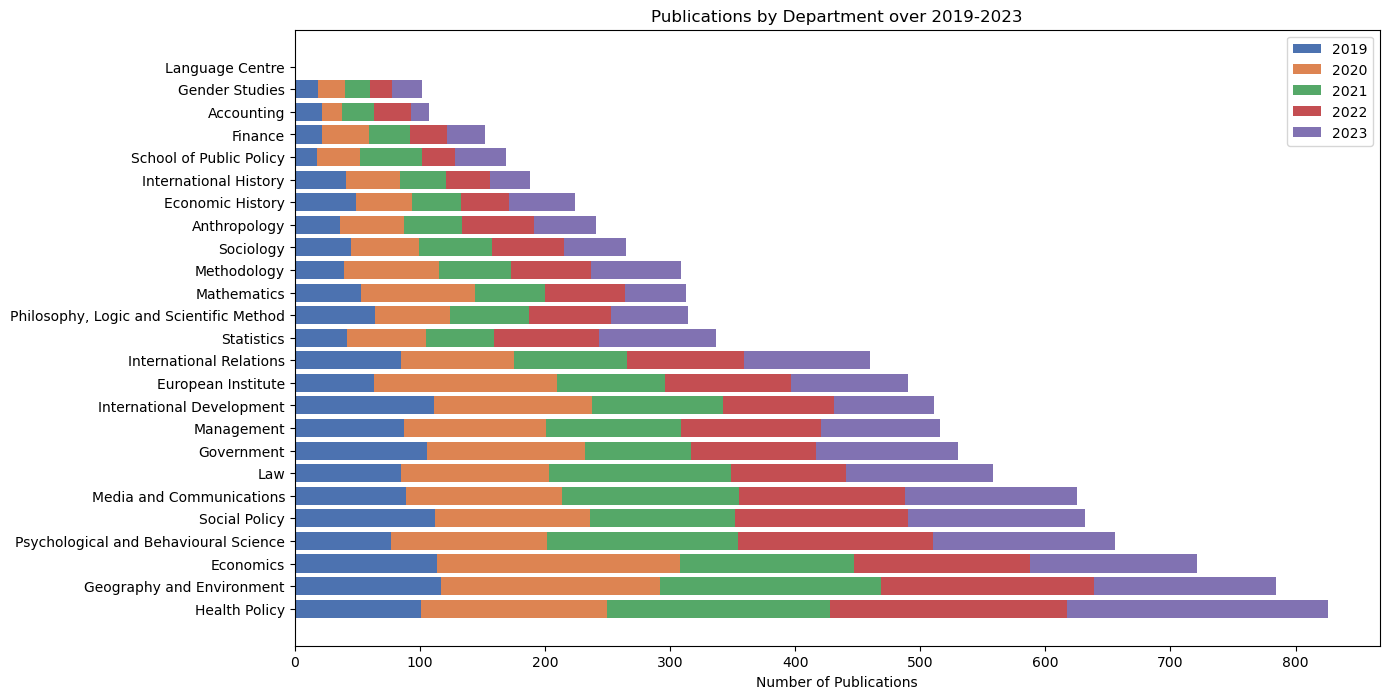

In [19]:


publications = pd.read_csv("Data/department_yearly_results.csv")
publications['Department'] = publications['Department'].str.replace('&', 'and')
#years_to_drop = [str(year) for year in range(2010, 2019)]
#publications = publications.drop(columns=years_to_drop)

# Convert years columns to numeric, replacing non-numeric entries with NaNs
years = ['2019', '2020', '2021', '2022', '2023']
for year in years:
    publications[year] = pd.to_numeric(publications[year], errors='coerce')

publications['Total'] = publications[years].sum(axis=1)
publications = publications.sort_values(by='Total', ascending=False)
publications = publications.reset_index(drop=True)

fig, ax = plt.subplots(figsize=(14, 8))
indices = np.arange(len(publications['Department']))
colors = ['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b2']
widths = [np.nan_to_num(publications[year].astype(float)) for year in years]

cumulative_width = np.zeros(len(publications))
for width, color, year in zip(widths, colors, years):
    ax.barh(indices, width, color=color, label=year, left=cumulative_width)
    cumulative_width += width

ax.set(yticks=indices, yticklabels=publications['Department'])
ax.set_xlabel('Number of Publications')
ax.set_title('Publications by Department over 2019-2023')
ax.legend()

plt.show()


The horizontally stacked bar chart above visualises the number of annual publications of different departments over the years 2019 to 2023. 

While the relative ranking of departments by the number of publications appears relatively stable, there are exceptions with notable fluctuations, particularly around 2021. Departments such as Gender Studies, Law, and Economics showed a significant increase in publications during this year. The increase is visually identifiable by a longer green section compared to the blue and orange ones. On the other hand some department's publicaiton output decreased from 2020 to 2021.

This might be a direct consequence as through the change in tuition fees in 2021 due to Brexit, the fees that these departments collected might have changed significantly and as a result their funding avaiable for research increased or decreasing accordingly.

However this analysis is limited in the sense that there are many other factors that could have caused these changes in 2021. Particularly the trend for each department depends on  its size, funding, and the nature of the research field itself. Thus it is hard to directly identify the changed tuition fee structure of Brexit as the cause of this change in trend. Therefore a more rigorous analysis is required which examines whether fees collected affected the publications output.

Thus we now examine which departments gained the most additional fees from the changed tuition fee structure. We take this by multiplying the number of EU entrants to each department times the difference in tuition fees that these EU students now pay extra (i.e. overseas - home fees). 

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

final_merged_fees = pd.read_csv("Data/TuitionFees/FinalTableFeeDifference.csv")
final_merged_fees = final_merged_fees[final_merged_fees['Department'] != "Department not found"]
final_merged_fees['Department'] = final_merged_fees['Department'].str.replace("Department of ", "", regex=False)

second_column_name = final_merged_fees.columns[1]  # Adjust the index if your column order is different
final_merged_fees[second_column_name] = final_merged_fees[second_column_name].str.replace("Undergraduate", "UG", regex=False)
final_merged_fees[second_column_name] = final_merged_fees[second_column_name].str.replace("Postgraduate", "PG", regex=False)
final_merged_fees.columns = final_merged_fees.columns.str.replace("_", " ", regex=False)

#final_merged_fees.drop(final_merged_fees.columns[2], axis=1, inplace=True)

final_merged_fees.reset_index(drop=True, inplace=True)

entrances_df_eu = pd.read_csv("Data/EU_Entrances_Question_Four.csv")
extra_eu_fees_merged = pd.merge(final_merged_fees, entrances_df_eu, on=['Department', 'Level'], suffixes=('_fees', '_entrances'))
display(extra_eu_fees_merged)
extra_eu_fees_result = extra_eu_fees_merged[['Department', 'Level']].copy()
years = ['2019', '2020', '2021', '2022', '2023']
for year in years:
    fee_col = f'Fee Difference {year}'
    entrance_col = f'Entrances {year}'
    extra_eu_fees_result[f'Extra Fees through EU {year}'] = extra_eu_fees_merged[fee_col] * extra_eu_fees_merged[entrance_col]

year_columns = ['Extra Fees through EU 2019', 'Extra Fees through EU 2020', 'Extra Fees through EU 2021', 'Extra Fees through EU 2022', 'Extra Fees through EU 2023']
for column in year_columns:
    extra_eu_fees_result[column] = extra_eu_fees_result[column].astype(int)

extra_eu_fees_result = extra_eu_fees_result.drop('Level', axis=1)
new_dataframe = extra_eu_fees_result.groupby('Department')[year_columns].sum()
new_dataframe

Department Level  Fee Difference 2019  \
0                                Accounting    PG                552.0   
1                                Accounting    UG              10670.0   
2                              Anthropology    PG               7656.0   
3                              Anthropology    UG              10670.0   
4                          Economic History    PG               7656.0   
5                          Economic History    UG              10670.0   
6                                 Economics    PG                276.0   
7                                 Economics    UG              10670.0   
8                        European Institute    PG                  0.0   
9                                   Finance    PG                276.0   
10                                  Finance    UG              10670.0   
11                           Gender Studies    PG               7656.0   
12                Geography and Environment    PG               6657.0   
13                Geography and Environment    UG              10670.0   
14                               Government    PG               7656.0   
15                               Government    UG              10670.0   
16                            Health Policy    PG               7320.0   
17                International Development    PG               7656.0   
18                    International History    PG               7656.0   
19                    International History    UG              10670.0   
20                  International Relations    UG              10670.0   
21                          Language Centre    UG              10670.0   
22                               Management    PG                439.6   
23                               Management    UG              10670.0   
24                              Mathematics    UG              10670.0   
25                 Media and Communications    PG                  0.0   
26                              Methodology    PG                552.0   
27  Philosophy, Logic and Scientific Method    UG              10670.0   
28    Psychological and Behavioural Science    PG               3828.0   
29    Psychological and Behavioural Science    UG              10670.0   
30                                Sociology    PG               5176.0   
31                                Sociology    UG              10670.0   
32                               Statistics    PG                552.0   
33                               Statistics    UG              10670.0   

    Fee Difference 2020  Fee Difference 2021  Fee Difference 2022  \
0                 576.0                600.0                624.0   
1               12320.0              13180.0              14080.0   
2                7968.0               8304.0               8640.0   
3               12320.0              13180.0              14080.0   
4                7968.0               8304.0               8640.0   
5               12320.0              13180.0              14080.0   
6                 288.0                300.0                  0.0   
7               12320.0              13180.0              14080.0   
8                   0.0                  0.0                  0.0   
9                 288.0                300.0                312.0   
10              12320.0              13180.0              14080.0   
11               7968.0               8304.0               8640.0   
12               6837.0               6328.0               6536.0   
13              12320.0              13180.0              14080.0   
14               7968.0               8304.0                  0.0   
15              12320.0              13180.0              14080.0   
16               7608.0               5264.0               5472.0   
17               7968.0               8304.0               8640.0   
18               7968.0               8304.0               8640.0   
19              12320.0              13180.0              1408

Extra Fees through EU 2019  \
Department                                                            
Accounting                                                   214510   
Anthropology                                                 236852   
Economic History                                             458392   
Economics                                                    172194   
European Institute                                                0   
Finance                                                      182130   
Gender Studies                                               191400   
Geography and Environment                                    800491   
Government                                                   981288   
Health Policy                                                234240   
International Development                                    505296   
International History                                        579260   
International Relations                                      181390   
Language Centre                                              160050   
Management                                                   617583   
Mathematics                                                  213400   
Media and Communications                                          0   
Methodology                                                    8280   
Philosophy, Logic and Scientific Method                      234740   
Psychological and Behavioural Science                        336380   
Sociology                                                    507478   
Statistics                                                   133560   

                                         Extra Fees through EU 2020  \
Department                                                            
Accounting                                                   405888   
Anthropology                                                 360096   
Economic History                                             565856   
Economics                                                    224416   
European Institute                                                0   
Finance                                                      300704   
Gender Studies                                               326688   
Geography and Environment                                    827612   
Government                                                   972288   
Health Policy                                                448872   
International Development                                    717120   
International History                                        747040   
International Relations                                      271040   
Language Centre                                              271040   
Management                                                   986790   
Mathematics                                                  431200   
Media and Communications                                          0   
Methodology                                                    9792   
Philosophy, Logic and Scientific Method                      357280   
Psychological and Behavioural Science                        488320   
Sociology                                                    497072   
Statistics                                                   162240   

                                         Extra Fees through EU 2021  \
Department                                                            
Accounting                                                   192360   
Anthropology                                                 282720   
Economic History                                             299328   
Economics                                                    276200   
European Institute                                                0   
Finance                                                      311560   
Gender Studies                                               30

Thus we now visualise this data.

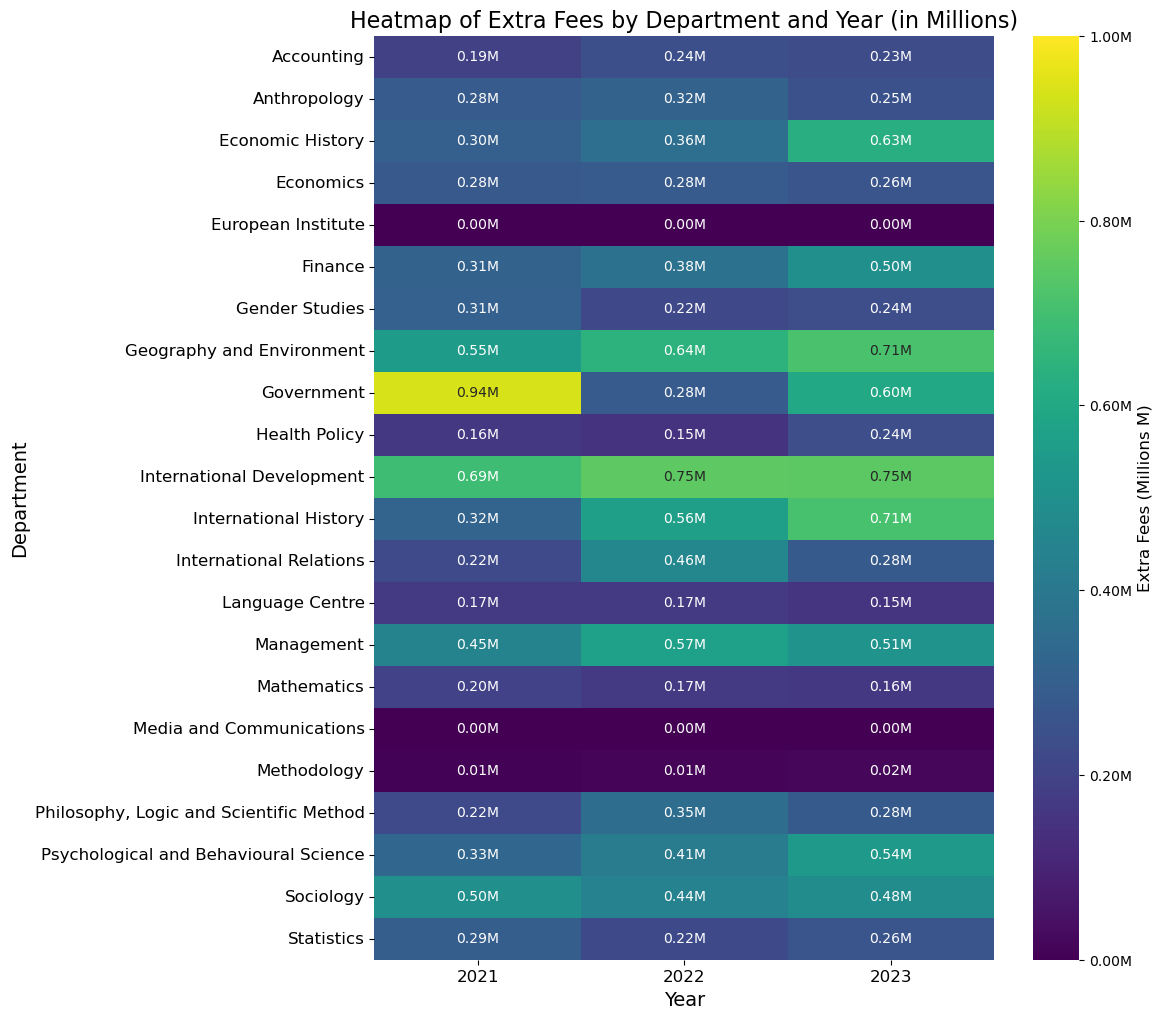

In [21]:
department_fees_publications_df = pd.merge(publications, new_dataframe, on='Department', how='inner')

# Extract the column names
column_names = department_fees_publications_df.columns

# Reorganize the column names
new_column_order = ['Department']
for year in range(2019, 2024):
    new_column_order.append(str(year))
    new_column_order.append(f'Extra Fees through EU {year}')

# Reorder the DataFrame columns
department_fees_publications_df = department_fees_publications_df[new_column_order]

renamed_columns = {}
for column in department_fees_publications_df.columns:
    if column.isdigit():
        renamed_columns[column] = f'Publications {column}'

department_fees_publications_df = department_fees_publications_df.rename(columns=renamed_columns)
columns_to_drop = department_fees_publications_df.columns[department_fees_publications_df.columns.str.contains('2019|2020')]
department_fees_publications_df = department_fees_publications_df.drop(columns=columns_to_drop)

# Correct the script based on the printed column names
import seaborn as sns
import matplotlib.pyplot as plt

# Correctly referencing DataFrame and column names
heatmap_data = department_fees_publications_df.pivot_table(index="Department", values=['Extra Fees through EU 2021', 'Extra Fees through EU 2022', 'Extra Fees through EU 2023'], aggfunc='sum') / 1_000_000  # Convert to millions
fig, ax = plt.subplots(figsize=(10, 12))
heat_map = sns.heatmap(heatmap_data, ax=ax, annot=True, fmt=".2f", cmap='viridis', annot_kws={'size':10}, vmax=1.00)
ax.set_title('Heatmap of Extra Fees by Department and Year (in Millions)', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Department', fontsize=14)
ax.set_xticklabels(['2021', '2022', '2023'], rotation=0, fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

# Annotate each cell with "M"
for text in ax.texts:
    text.set_text(text.get_text() + "M")

# Adjusting the colorbar labels to exclude values over 1.00M
colorbar = ax.collections[0].colorbar
colorbar.set_label('Extra Fees (Millions M)', fontsize=12)
colorbar.set_ticks([x for x in colorbar.get_ticks() if x <= 1.00])
colorbar.set_ticklabels([f"{x:.2f}M" for x in colorbar.get_ticks()])

plt.show()


The heatmap above provides an initial insight into which departments have benefited most from the changes in tuition fee structures following Brexit. As explained above, this was generated by calculating the increase in fees paid by EU students, defined as the difference between the overseas fee and the home fee, and then multiplying this by the number of EU entrants to these departments over the specified years. This effectively represents the total increase in tuition fees received from EU students by each department

Immediately the yellow government field stands out which showed that the government department incurred an nearly an additional 1 million pounds in tuition fees from European students in 2021. However, this result appears to be an anomaly as it declines substantially in the following year before increasing again so its hard to interpret this more comprehensively.

Certain departments such as Finance, Geography and Economic history showed consistent growth througout these periods. This suggests that these courses have increased in popularity among EU students despite them now paying more fees for these courses. This is an important metric for LSE as it can perhaps see what makes these courses increase in attractiveness despite raised fees to ensure the university can continue attracting good talent.

However as this heatmap does not provide any information on department size it does not make sense to look at absolute values further because it is uncertain whether high numbers are a result of high number of EU entrants or high fees. 

While it is hard to find more general trends and there seem to be much fluctuations across departments, the overall trend can be considered to be increasing. This again implies that LSE continues to attract EU students after the changed tuition fees. 

Moreover as the tuition fee structure only changed for students entering in 2021 there is not that much historical data from which trends can be interpreted more clearly. Moreover, it is uncertain how this increase in fees is allocated across departments, for example whether it goes into research, etc. Even more importantly this does not provide any insights into the total fees generated by each department which is arguably the more important metric. For example perhaps following Brexit these departments generated more fees from EU students but overall their collected fees went down due to other reasons.

In [22]:
# Prepare a new DataFrame to hold transformed data
new_rows = []

# Loop through each year and create new rows
for year in [2021, 2022, 2023]:
    temp_df = department_fees_publications_df[['Department', f'Publications {year}', f'Extra Fees through EU {year}']].copy()
    temp_df['Year'] = year
    temp_df.rename(columns={f'Publications {year}': 'Publications',
                            f'Extra Fees through EU {year}': 'Extra Fees'}, inplace=True)
    temp_df['Department'] = temp_df['Department'] + ' ' + str(year)
    new_rows.append(temp_df)

# Concatenate all new rows
long_publications_extraFees_df = pd.concat(new_rows)

# Sort and reset index for better readability
long_publications_extraFees_df = long_publications_extraFees_df.sort_values(by=['Department']).reset_index(drop=True)

long_publications_extraFees_df.drop(columns=['Year'], inplace=True)
long_publications_extraFees_df

Department  Publications  Extra Fees
0                                Accounting 2021          25.0      192360
1                                Accounting 2022          30.0      238656
2                                Accounting 2023          14.0      228624
3                              Anthropology 2021          47.0      282720
4                              Anthropology 2022          57.0      315840
5                              Anthropology 2023          50.0      249500
6                          Economic History 2021          39.0      299328
7                          Economic History 2022          38.0      356800
8                          Economic History 2023          53.0      625240
9                                 Economics 2021         139.0      276200
10                                Economics 2022         141.0      281600
11                                Economics 2023         133.0      260130
12                       European Institute 2021          86.0           0
13                       European Institute 2022         101.0           0
14                       European Institute 2023          93.0           0
15                                  Finance 2021          33.0      311560
16                                  Finance 2022          30.0      378208
17                                  Finance 2023          30.0      496746
18                           Gender Studies 2021          20.0      307248
19                           Gender Studies 2022          18.0      216000
20                           Gender Studies 2023          24.0      237000
21                Geography and Environment 2021         177.0      547876
22                Geography and Environment 2022         170.0      644072
23                Geography and Environment 2023         145.0      711528
24                               Government 2021          85.0      937672
25                               Government 2022         100.0      281600
26                               Government 2023         113.0      600095
27                            Health Policy 2021         178.0      163184
28                            Health Policy 2022         189.0      147744
29                            Health Policy 2023         209.0      235872
30                International Development 2021         104.0      689232
31                International Development 2022          89.0      751680
32                International Development 2023          80.0      748920
33                    International History 2021          37.0      316468
34                    International History 2022          35.0      559040
35                    International History 2023          32.0      707560
36                  International Relations 2021          91.0      224060
37                  International Relations 2022          93.0      464640
38                  International Relations 2023         101.0      278902
39                          Language Centre 2021           NaN      171340
40                          Language Centre 2022           NaN      168960
41                          Language Centre 2023           NaN      154700
42                               Management 2021         108.0      448950
43                               Management 2022         112.0      566316
44                               Management 2023          95.0      514036
45                              Mathematics 2021          56.0      197700
46                              Mathematics 2022          64.0      168960
47                              Mathematics 2023          49.0      164060
48                 Media and Communications 2021         141.0           0
49                 Media and Communications 2022         133.0           0
50                 Media and Communications 2023         137.0           0
51                              Methodology 2021          58.0        7200
52                              Methodology 2022          64.0 

As previously mentioned, it is hard to determine how the increased tuition fees generated from EU students is allocated within departments. We will now try to examine this more precisely.

Research notably is a very important component of any university department. As already mentioned, we try to proxy for research using the number of publications of each department as a higher number of publications indicates a higher research activity.


In [23]:
import statsmodels.api as sm
import plotly.express as px

# Assuming long_publications_extraFees_df is already loaded

# Convert data types to float (if they are not already floats)
long_publications_extraFees_df['Extra Fees'] = pd.to_numeric(long_publications_extraFees_df['Extra Fees'], errors='coerce')
long_publications_extraFees_df['Publications'] = pd.to_numeric(long_publications_extraFees_df['Publications'], errors='coerce')

# Drop any rows with missing data after the conversion
long_publications_extraFees_df = long_publications_extraFees_df.dropna()

# Perform linear regression
X = sm.add_constant(long_publications_extraFees_df['Extra Fees'])  # adding a constant
model = sm.OLS(long_publications_extraFees_df['Publications'], X).fit()

# Print the regression summary
print(model.summary())

# Plotting the result without text parameter
fig = px.scatter(long_publications_extraFees_df, x='Extra Fees', y='Publications', trendline="ols",
                 labels={"Extra_Fees": "Extra Fees", "Publications": "Publications"},
                 title="Regression of Publications on Extra Fees")

# Customizing hover data to only show department name when hovered over
fig.update_traces(
    hovertemplate="Extra Fees: %{x}<br>Publications: %{y}<br>Department: %{text}"
)

# Adding the department names as hover text
fig.add_scatter(x=long_publications_extraFees_df['Extra Fees'], y=long_publications_extraFees_df['Publications'],
                mode='markers', hoverinfo='text', text=long_publications_extraFees_df['Department'],
                showlegend=False)

# Update layout for centered title
fig.update_layout(
    title={
        'text': "Regression of Publications on Extra Fees through EU students",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    hovermode="closest"
)

fig.show()


                            OLS Regression Results                            
Dep. Variable:           Publications   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                   0.01416
Date:                Wed, 01 May 2024   Prob (F-statistic):              0.906
Time:                        23:39:10   Log-Likelihood:                -333.38
No. Observations:                  63   AIC:                             670.8
Df Residuals:                      61   BIC:                             675.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.9594     11.246      7.466      0.0

The above regresses the number of publications on the additional fees generated by EU students across departments through the years 2021 to 2023. This is meant to examine whether a higher extra fees generated EU students in a particular years corresponds to a higher number of publications of that department within a particular year. Continuing the notion of publications proxying research, the idea here is that if there would be a positive regression coefficient it would imply that these additional fees are allocated towards research.

However, as already seen by just inspecting the dots across the graph, these are scattered without indication of any trend. This is confirmed by the coefficient of extra fees being almost 0 and not significant at all (p-value is much higher than even 10%). 

Therefore, no trend can be interpreted from this graph and a higher amount of fees generated by EU students does not seem to result in more/less research. Thus, the data is still not revealing of how these additional fees are allocated. 

At least from this simplified lense the effect of changed tuition structure due to Brexit did not seem to impact research of these departments. 

However, this result has to be interpreted cautiously as perhaps the effect of increased tuition fees generated from EU students on research output only appears after a substantial time lag as research is a time intensive process. Thus as the regression only incorporates data from the past 3 years, this effect may have not been present in the data yet. Therefore, perhaps this effect would be more visible if this was conducted further into the future and we had more data points available.

Consequently, as mentioned above we should also examine the total fees collected by the departments over the years as perhaps they compensated less EU student revenue with revenues from other international students or by simply increasing in size. Especially as we saw in question 1, that EU applicants and entrants have decreased while the total applications have gone up. We will now do this below:

In [24]:
import pandas as pd

# Load data
country_eu_indicator = pd.read_csv('Data/countryEUindicator.csv')
final_merged_fees_all_years = pd.read_csv('Data/FinalMergedFeesAllYears.csv')



# Define the cleaning function for department names
def clean_department_name(name):
    # Standardize to "Department of X" format
    name = " ".join(name.title().split())  # Clean up extra spaces and capitalize correctly
    if not name.startswith("Department Of"):
        name = "Department of " + name
    return name.replace("Department Of ", "Department of ")

# Apply the cleaning function to the department names
country_eu_indicator['Department'] = country_eu_indicator['Department'].astype(str).apply(clean_department_name)
final_merged_fees_all_years['Department'] = final_merged_fees_all_years['Department'].astype(str).apply(clean_department_name)

# Identify the years 2019 to 2023 from the fee data columns
years = [year for year in range(2019, 2024)]

# Prepare the results DataFrame
results_df = pd.DataFrame()

# Calculate fees for each department and each year
for year in years:
    total_fees_by_department = {}
    for department in country_eu_indicator['Department'].unique():
        fee_data = final_merged_fees_all_years[
            (final_merged_fees_all_years['Department'] == department) &
            final_merged_fees_all_years['Level'].isin(['Undergraduate', 'Postgraduate'])
        ][['Level', f'Home Fee_{year}', f'Overseas Fee_{year}']].drop_duplicates()

        if not fee_data.empty:
            entries = country_eu_indicator[
                (country_eu_indicator['Department'] == department) &
                country_eu_indicator['Program'].str.contains('UG|PG', regex=True)
            ][['Nationality', 'Program', f'Entrances {year}', 'EU']].dropna()

            entries['Total Fees'] = entries.apply(
                lambda row: row[f'Entrances {year}'] * (
                    fee_data.loc[fee_data['Level'] == ('Undergraduate' if 'UG' in row['Program'] else 'Postgraduate'),
                                 f'Home Fee_{year}' if row['EU'] == 'Yes' and year <= 2020 else f'Overseas Fee_{year}'].iloc[0]
                    if not fee_data[fee_data['Level'] == ('Undergraduate' if 'UG' in row['Program'] else 'Postgraduate')].empty else 0),
                axis=1
            )
            total_fees_by_department[department] = entries['Total Fees'].sum()
        # Remove departments where fee data is not available
        elif department not in total_fees_by_department:
            total_fees_by_department[department] = "Fee data not available."

    # Append the results for the year to the results DataFrame
    year_results_df = pd.DataFrame.from_dict(total_fees_by_department, orient='index', columns=[year])
    results_df = pd.concat([results_df, year_results_df], axis=1)

# Display the final results table
results_df = results_df.loc[results_df.min(axis=1) != "Fee data not available."]  # Remove rows with fee data not available

results_df = results_df.loc[results_df.min(axis=1) != "Fee data not available."]  # Remove rows with fee data not available
results_df.reset_index(inplace=True)  # Reset the index

publications_departments = pd.read_csv("Data/department_yearly_results.csv")
publications_departments['Department'] = publications_departments['Department'].str.replace('&', 'and')

publications_departments.rename(columns=lambda x: f'Publications {x}' if x.isdigit() else x, inplace=True)

def modify_department_name(department):
    department = department.replace(" and ", " And ")  # Change "and" to "And"
    return "Department of " + department

# Apply the function to the "Department" column
publications_departments['Department'] = publications_departments['Department'].apply(modify_department_name)
publications_departments['Department'] = publications_departments['Department'].replace('Department of Law', 'Department of Law School')

# Merge the two DataFrames on their first columns
merged_df = pd.merge(publications_departments, results_df, left_on=publications_departments.columns[0], right_on=results_df.columns[0])

merged_df = merged_df.drop(columns=['index'])

for year in range(2019, 2024):
    merged_df.rename(columns={str(year): f'Fees {year}'}, inplace=True)

# Add "Fees " before the names of columns 7 to 11
for i in range(6, 11):
    merged_df.rename(columns={merged_df.columns[i]: f'Fees {merged_df.columns[i]}'}, inplace=True)
    
column_names = merged_df.columns

# Reorganize the column names
new_column_order = ['Department']
for year in range(2019, 2024):
    new_column_order.append(f'Publications {year}')
    new_column_order.append(f'Fees {year}')

# Reorder the DataFrame columns
merged_df = merged_df[new_column_order]

merged_df['Department'] = merged_df['Department'].str.replace("Department of ", "", regex=False)
merged_df['Department'] = merged_df['Department'].str.replace('And', 'and')
# Convert all columns to string type
merged_df = merged_df.astype(str)

# Check for rows containing the phrase "no results" in any column
rows_to_remove = merged_df.apply(lambda row: row.str.contains('no results')).any(axis=1)

# Remove rows containing the phrase "no results"
merged_df = merged_df[~rows_to_remove]
merged_df = merged_df.reset_index(drop=True)
merged_df

Department Publications 2019   Fees 2019  \
0                 Geography and Environment               117   7221519.0   
1   Philosophy, Logic and Scientific Method                64   2109520.0   
2     Psychological and Behavioural Science                77   5140297.0   
3                                Government               106   7992932.0   
4                                Law School                85   2084755.0   
5                             Social Policy               112   6075856.0   
6                               Mathematics                53   4440470.0   
7                          Economic History                49   4127372.0   
8                                 Sociology                45   7282179.0   
9                     International History                41   6077782.0   
10                               Statistics                42   4399272.0   
11                               Management                87  16939801.0   
12                  International Relations                85   1491685.0   
13                             Anthropology                36   3824908.0   
14                                Economics               114   9041656.0   
15                               Accounting                22   7915594.0   
16                                  Finance                22   7051549.0   
17                              Methodology                39   1779720.0   
18                       European Institute                63   5707800.0   
19                 Media and Communications                89   5316408.0   
20                            Health Policy               101   4726388.0   
21                International Development               111   6557676.0   
22                           Gender Studies                19   2598876.0   

   Publications 2020   Fees 2020 Publications 2021    Fees 2021  \
0                175   8450746.0               177   8629743.78   
1                 60   2664200.0                63    2274675.0   
2                125   5767273.0               152    6894095.0   
3                126   8402907.0                85    9332575.0   
4                118   2866515.0               146    2181355.0   
5                124   6977112.0               116    6856915.0   
6                 91   4740935.0                56    5447555.0   
7                 45   5396615.0                39    4759170.0   
8                 54   7914412.0                59    9395813.0   
9                 43   7081537.0                37    6628535.0   
10                63   5568015.0                54    5445430.0   
11               114  18974998.6               108   18317917.0   
12                90   2202840.0                91    1446460.0   
13                51   4996879.0                47    4700750.0   
14               194  10299491.0               139    9288520.0   
15                16   8082084.0                25    8609955.0   
16                37   8319261.0                33    7809830.0   
17                76   2117760.0                58    2213640.0   
18               147   7098912.0                86    6856080.0   
19               125   5968512.0               141    5127360.0   
20               149   6323436.0               178  5991299.445   
21               127   8005584.0               104    9208080.0   
22                21   3343128.0                20    4457040.0   

   Publications 2022    Fees 2022 Publications 2023           Fees 2023  
0                170  9192720.545               145  10239735.075000001  
1                 66    3429510.0                61           2347524.0  
2                156    8458171.0               146           8277600.0  
3                100    8734595.0               113          11065084.8  
4                 92    2566300.0               117           2340096.0  
5                138    7897205.0               142           7605580.0  
6                 64    4677665.0                49      

Now will plot the entire fees collected by departments, where fees collected are again obtained by multiplying (the appropriate tuition fee) times the entrants for each department.

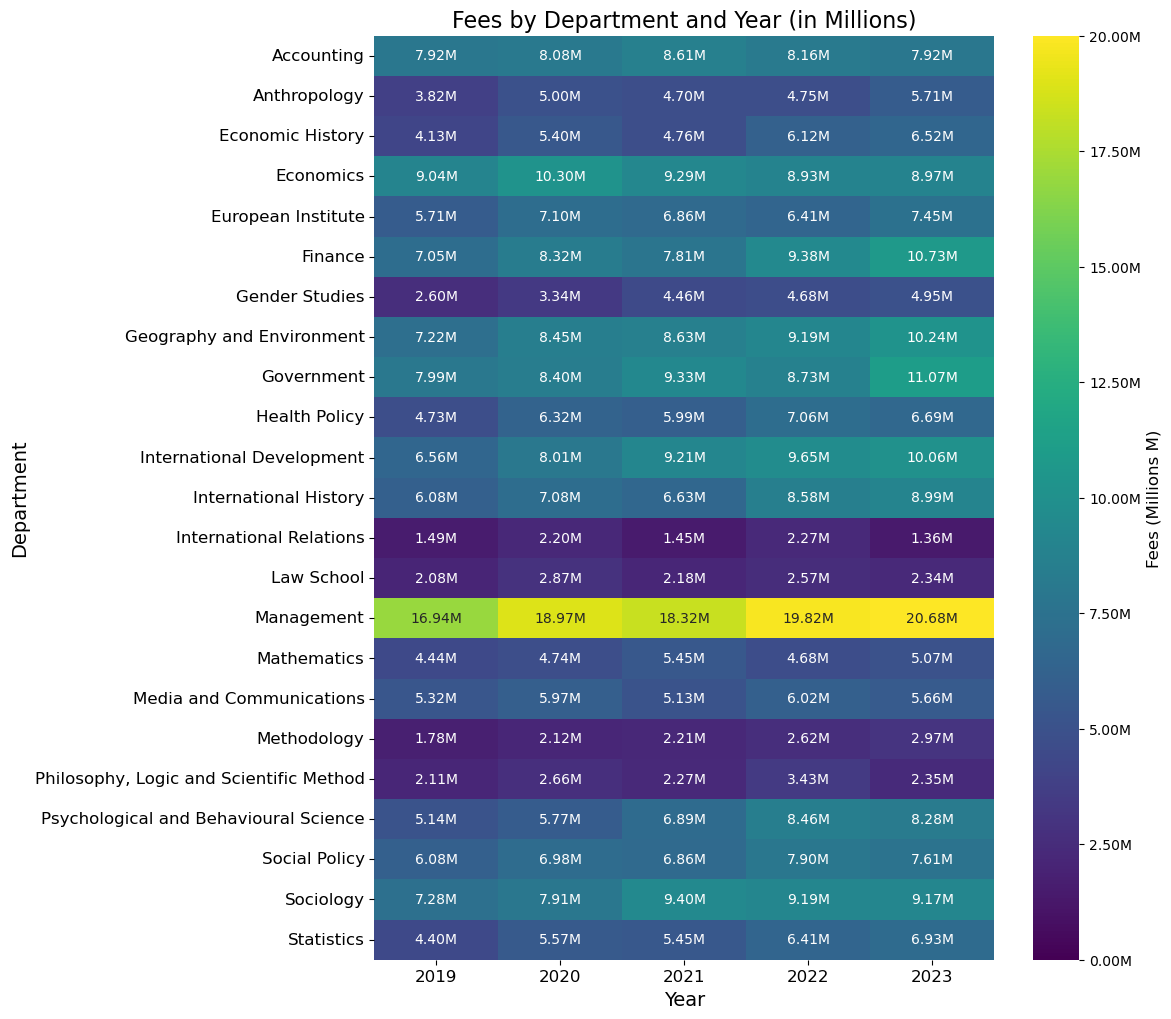

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert fees columns to numeric
fees_columns = ["Fees 2019", "Fees 2020", 'Fees 2021', 'Fees 2022', 'Fees 2023']
merged_df[fees_columns] = merged_df[fees_columns].apply(pd.to_numeric)

# Correctly referencing DataFrame and column names
heatmap_data = merged_df.pivot_table(index="Department", values=fees_columns, aggfunc='sum') / 1_000_000  # Convert to millions
fig, ax = plt.subplots(figsize=(10, 12))
heat_map = sns.heatmap(heatmap_data, ax=ax, annot=True, fmt=".2f", cmap='viridis', annot_kws={'size':10}, vmax=20, vmin=0) # Adjusted scale to 20M and set vmin to 0
ax.set_title('Fees by Department and Year (in Millions)', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Department', fontsize=14)
ax.set_xticklabels(['2019', '2020', '2021', '2022', '2023'], rotation=0, fontsize=12)  # Adjusted number of tick labels
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

# Annotate each cell with "M"
for text in ax.texts:
    text.set_text(text.get_text() + "M")

# Adjusting the colorbar labels to exclude values over 20.00M
colorbar = ax.collections[0].colorbar
colorbar.set_label('Fees (Millions M)', fontsize=12)
colorbar.set_ticks([x for x in colorbar.get_ticks() if x <= 20.00])
colorbar.set_ticklabels([f"{x:.2f}M" for x in colorbar.get_ticks()])

plt.show()


The above heatmap represents the total fees collected by each department from 2020 to 2023, measured in millions of pounds (£M). The color intensity indicates the amount of fees collected, with darker colors representing higher fees.

From the graph it is visible that the overall trend across departments is fees collected increasing quite significantly over the the years, except for 2021 where the amount of fees collected decreased for most departments before increasing to levels higher than in the preceding years. As already discussed earlier, the amount of fees decreasing in 2021 is likely a result of this being the year after Covid and LSE admitted significantly less students than in prior years.

However, the values in 2022 and 2023 being higher than in the years leading up to 2021 suggests that this increase is in fact due to the changed tuition fee structure which now caused EU students to pay significantly more. As established previously, LSE continued to attract EU students, despite their increased tuition fees so this increase can be attributed to this. 

It is worth mentioning that the fees for international students have continuously increased through the years but the increase seen in the graph is not gradual enough throughout the years for this to be the sole reason. Notably this change may also be caused by the departments simply increasing in size. However, it is unlikely that the departments increased in size that much over a relatively short time span. Especially as there was Covid in between where it is unlikely that departments increased their size.

Therefore, this reveals that the changed tuition fee structure due to Brexit did in fact increase the amount of fees collected by the departments (in general). This again underlines that LSE remains attractive despite increased costs (as offer rates have stayed fairly consistent). Moreover, this means that as a result departments have more money available which they can allocate towards research or increasing their department etc. 

Thus if the additional fees truly go into research, we would expect for research to increase throughout the years as data collected increased. This will now be explored.

In [26]:
# Prepare a new DataFrame to hold transformed data
new_rows = []

# Loop through each year and create new rows
for year in [2019, 2020, 2021, 2022, 2023]:
    temp_df = merged_df[['Department', f'Publications {year}', f'Fees {year}']].copy()
    temp_df['Year'] = year
    temp_df.rename(columns={f'Publications {year}': 'Publications',
                            f'Fees {year}': 'Fees'}, inplace=True)
    temp_df['Department'] = temp_df['Department'] + ' ' + str(year)
    new_rows.append(temp_df)

# Concatenate all new rows
long_publications_fees_df = pd.concat(new_rows)

# Sort and reset index for better readability
long_publications_fees_df = long_publications_fees_df.sort_values(by=['Department']).reset_index(drop=True)

# Show the resulting DataFrame
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
long_publications_fees_df['Fees'] = long_publications_fees_df['Fees'].astype(int)
long_publications_fees_df = long_publications_fees_df.drop(columns='Year')

import statsmodels.api as sm
import plotly.express as px

# Convert data types to float (if they are not already floats)
long_publications_fees_df['Fees'] = pd.to_numeric(long_publications_fees_df['Fees'], errors='coerce')
long_publications_fees_df['Publications'] = pd.to_numeric(long_publications_fees_df['Publications'], errors='coerce')

# Drop any rows with missing data after the conversion
long_publications_fees_df = long_publications_fees_df.dropna()

# Perform linear regression
X = sm.add_constant(long_publications_fees_df['Fees'])  # adding a constant
model = sm.OLS(long_publications_fees_df['Publications'], X).fit()

# Print the regression summary
print(model.summary())

# Plotting the result without text parameter
fig = px.scatter(long_publications_fees_df, x='Fees', y='Publications', trendline="ols",
                 labels={"Fees": "Fees", "Publications": "Publications"},
                 title="Regression of Publications on Fees")

# Customizing hover data to only show department name when hovered over
fig.update_traces(
    hovertemplate="Fees: %{x}<br>Publications: %{y}<br>Department: %{text}"
)

# Adding the department names as hover text
fig.add_scatter(x=long_publications_fees_df['Fees'], y=long_publications_fees_df['Publications'],
                mode='markers', hoverinfo='text', text=long_publications_fees_df['Department'],
                showlegend=False)

# Update layout for centered title
fig.update_layout(
    title={
        'text': "Regression of Publications on Fees",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    hovermode="closest"
)

fig.show()


                            OLS Regression Results                            
Dep. Variable:           Publications   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     4.777
Date:                Wed, 01 May 2024   Prob (F-statistic):             0.0309
Time:                        23:39:15   Log-Likelihood:                -600.97
No. Observations:                 115   AIC:                             1206.
Df Residuals:                     113   BIC:                             1211.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.4245      8.986      7.614      0.0

The graph above depicts a regression of the number of publications of departments on the amount of Fees generated by the departments for the years 2019 to 2023. 

From the graph its immediately apparent that there seems to be a positive trend. This is confirmed by a very small but importantly positive slope coefficient. Even more importantly this slope coefficient is significant at the commonly used 5% significance level. This implies that there is a statistically significant positive relationship between fees collected and publications for a department (across these years).

This in turn indicates that at least part of the increased tuition fees that these departments generate (as discussed above) is allocated towards research which supports the natural assumption that departmental research also benefits from these increased tuition fees due to the brexit induced tuition fee change. 

Consequently, this seems to imply that LSE's research has benefitted from Brexit, at least in terms of finances. As better research helps contunue to attract students (even whilst fees are rising), this may result in a self perpetuating positive feedback cycle for LSE.

However, this statement must be expressed prudently. Primarily, just because a research department has more money available does not neccessarily mean that it's quality improves. Especially as due to Brexit some researchers feel less comfortable working in the UK as for example they may be worried about economic uncertainty or have some other issues that are Brexit related. This would halt these from going to the UK and thus LSE and perhaps the increased money is directed towards less competent research. Therefore, assessing how Brexit directly affects the quality of research must be conducted carefully.

Now to analyse this effect on a more cumulative level we take the sum of publications and total fees collected by these departments over the years to determine a more aggregate picture on the effect of fees on publications. This in turn will help us to examine the effect of Brexit on LSE further as the main impact of Brexit, at least financially, was the changed tuition fee structure.

In [27]:
# Remove the year from the Department column
long_publications_fees_df['Department'] = long_publications_fees_df['Department'].str.replace(r'\d+', '')

# Group by Department and sum up the rows
summed_publications_fees_df = long_publications_fees_df.groupby('Department', as_index=False).sum()

# Show the resulting DataFrame
summed_publications_fees_df = summed_publications_fees_df.rename(columns={'Publications': 'Total Publications', 'Fees': 'Total Fees'})

summed_publications_fees_df

/var/folders/w_/ccm86j116md1g5bmpdbhyv5r0000gn/T/ipykernel_6134/1572770423.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.



Department  Total Publications  Total Fees
0                                Accounting                  107    40681176
1                              Anthropology                  241    23981630
2                          Economic History                  224    26926490
3                                 Economics                  721    46532082
4                        European Institute                  490    33522264
5                                   Finance                  152    43290364
6                            Gender Studies                  102    20033088
7                 Geography and Environment                  784    43734463
8                                Government                  530    45528093
9                             Health Policy                  826    30795764
10                International Development                  511    43476192
11                    International History                  188    37362342
12                  International Relations                  460     8775428
13                               Law School                  558    12039021
14                               Management                  516    94734448
15                              Mathematics                  313    24378722
16                 Media and Communications                  625    28091976
17                              Methodology                  309    11705208
18  Philosophy, Logic and Scientific Method                  314    12825429
19    Psychological and Behavioural Science                  656    34537436
20                            Social Policy                  632    35412668
21                                Sociology                  265    42949559
22                               Statistics                  337    28753928

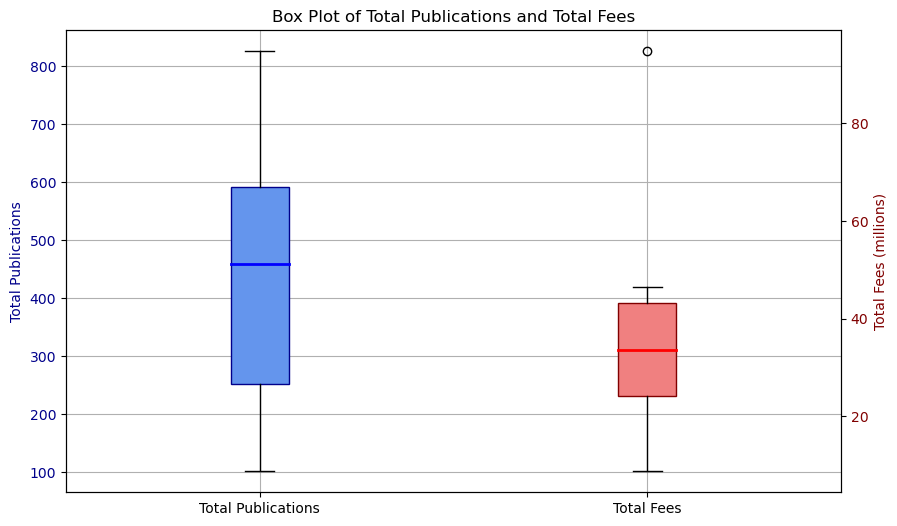

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



# Plotting the box plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the Total Publications box plot on the left y-axis
bp1 = ax1.boxplot(summed_publications_fees_df['Total Publications'], positions=[1], labels=['Total Publications'], patch_artist=True, boxprops=dict(facecolor='cornflowerblue', color='darkblue'))
ax1.set_ylabel('Total Publications', color='darkblue')
ax1.tick_params(axis='y', labelcolor='darkblue')
ax1.grid(True)

# Setting the color of the median line for Total Publications
for median in bp1['medians']:
    median.set(color='blue', linewidth=2)

# Creating a twin axis for Total Fees on the right side
ax2 = ax1.twinx()
# Plotting the Total Fees box plot on the right y-axis
bp2 = ax2.boxplot(summed_publications_fees_df['Total Fees'] / 1000000, positions=[2], labels=['Total Fees (millions)'], patch_artist=True, boxprops=dict(facecolor='lightcoral', color='maroon'))
ax2.set_ylabel('Total Fees (millions)', color='maroon')
ax2.tick_params(axis='y', labelcolor='maroon')

# Setting the color of the median line for Total Fees
for median in bp2['medians']:
    median.set(color='red', linewidth=2)

# Set x-axis ticks
ax1.set_xticks([1, 2])
ax1.set_xticklabels(['Total Publications', 'Total Fees'])

plt.title('Box Plot of Total Publications and Total Fees')
plt.show()


From the graph it is visible that publications is much more variable than total fees. This makes sense given the fact that the tuition fee is always in a somewhere similar range across courses of different departments and generally the departments do not vary that significantly in size (especially as the very large management department has been excluded as an outlier). 

In comparison, total publications being more variable also makes sense as departments vary alot in how research based they are, so even if a department were to gain higher fees this does not automatically mean this would be allocated towards research.

Therefore we need to be careful about how we interpret the effect of the change in tution fee structure due to brexit on research as a main component of this effect is how research based these departments are which can vary significantly.

Also before doing any further analysis it is worth visualizing how exactly the fees and publications are allocated across departments:

In [29]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots


# Create interactive pie chart for Total Publications
fig_pub = go.Figure(go.Pie(labels=summed_publications_fees_df['Department'], values=summed_publications_fees_df['Total Publications']))
fig_pub.update_layout(title='Distribution of Total Publications')

# Create interactive pie chart for Total Fees
fig_fees = go.Figure(go.Pie(labels=summed_publications_fees_df['Department'], values=summed_publications_fees_df['Total Fees']))
fig_fees.update_layout(title='Distribution of Total Fees')

# Displaying the pie charts
fig_pub.show()
fig_fees.show()


From the first pie chart it becomes apparent that research (or at least research proxied by publications) is dominated by a couple of departments such as health policy, geography and economics. This again indicates that different departments place different emphasis on research although this is not immediately obvious from this pie chart as this does not reveal the size of an deparment which is also a major component of its research capabilities. However, in these departments with a high output of research (relative to other departments) it is likely that the effect of higher tuition fees through the brexit induced tuition fee structure has had a positive impact on research.

When looking at the distribution of total fees, as before, management stands out with collecting the highest amount of fees by far. This is likely the consequence of two main factors. Primarily management is a huge department but also it has a very high proportion of EU students. As these EU students now pay more it makes sense that management collects so much total fees. However, as the amount of fees collected by management was already high leading up to 2021 and they actually did not collect that much more additional fees (recall from earlier when examined the amount of additional fees generated by EU students after the tuition structure change) this sugggests that this high fee collection is mainly driven by the size of the department. This in turn indicates that the brexit induced tuition fee structure change may not have had such a significant effect as was assumed originally. 

Furthermore, while management collected by far the most fees it is only on 9th place in proportion of publications. This in addition to it being a huge department further underscores the point that higher fees does not neccessarily mean increased research which limits the validity of our initial analysis when we examined the relationship between fees generated and research output.

This can be further analysed by simply plotting the total fees against total publications for the departments across the time period.

In [30]:
import plotly.express as px

# Create an interactive scatter plot with hover functionality
fig = px.scatter(summed_publications_fees_df, x='Total Fees', y='Total Publications', color='Department',
                 hover_name='Department', title='Relationship between Total Publications and Total Fees',
                 labels={'Total Fees': 'Total Fees', 'Total Publications': 'Total Publications'},
                 template='plotly_white')

# Customize the layout
fig.update_layout(
    legend_title='Department',
    xaxis_title='Total Fees',
    yaxis_title='Total Publications',
    hovermode='closest'
)

# Show the plot
fig.show()


This simple scatter suggests a potential slight positive correlation. This again suggests that a higher number of collected tuition fees does correspond to a higher number of total publications for this time period (2019 to 2023). 

However, from the graph there are some points which are high up in only one axis, for example as mentioned before Health policy and geography are very dominant in research (according to their published publications) but they collected similar amounts of fees as the average departments (as the number of fees they collected is close to the median total fees for this period). For example accounting collected moore fees than health policy and only as approximalty one eigth of the research output. Again one must obviously acknowledge that some departments are just simply bigger in size but this is again indicative of some departments being more research focussed than others.

Moreover, compared to the case where we took the data for individual years (instead of the aggregate as above) this relationship seeems to be somewhat weaker as the points are scatteered across somewhat more arbitrarily. This proposition can be examined more rigorously by another regression, this time of total publicatons on total fees for this time period.

In [31]:
import statsmodels.api as sm
import plotly.express as px

# Assuming summed_publications_fees_df is already loaded

# Convert data types to float (if they are not already floats)
summed_publications_fees_df['Total Fees'] = pd.to_numeric(summed_publications_fees_df['Total Fees'], errors='coerce')
summed_publications_fees_df['Total Publications'] = pd.to_numeric(summed_publications_fees_df['Total Publications'], errors='coerce')

# Drop any rows with missing data after the conversion
summed_publications_fees_df = summed_publications_fees_df.dropna()

# Perform linear regression
X = sm.add_constant(summed_publications_fees_df['Total Fees'])  # adding a constant
model = sm.OLS(summed_publications_fees_df['Total Publications'], X).fit()

# Print the regression summary
print(model.summary())

# Plotting the result without text parameter
fig = px.scatter(summed_publications_fees_df, x='Total Fees', y='Total Publications', trendline="ols",
                 labels={"Total_Fees": "Total Fees", "Total Publications": "Total Publications"},
                 title="Regression of Total Publications on Total Fees")

# Customizing hover data to only show department name when hovered over
fig.update_traces(
    hovertemplate="Total Fees: %{x}<br>Total Publications: %{y}<br>Department: %{text}"
)

# Adding the department names as hover text
fig.add_scatter(x=summed_publications_fees_df['Total Fees'], y=summed_publications_fees_df['Total Publications'],
                mode='markers', hoverinfo='text', text=summed_publications_fees_df['Department'],
                showlegend=False)

# Update layout for centered title
fig.update_layout(
    title={
        'text': "Regression of Total Publications on Total Fees",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    hovermode="closest"
)

fig.show()


                            OLS Regression Results                            
Dep. Variable:     Total Publications   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.7944
Date:                Wed, 01 May 2024   Prob (F-statistic):              0.383
Time:                        23:39:15   Log-Likelihood:                -155.54
No. Observations:                  23   AIC:                             315.1
Df Residuals:                      21   BIC:                             317.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        350.3904     99.056      3.537      0.0

As suspected running this regression does indeed yield a positive slope coefficient which again is indicative of a positive relationship between total publications and total fees. 

However, unlike when this was performed taking the annual values instead of aggregated values, this positive slope coefficient is no longer statistically significant, even at the less rigorous 10% significance level, with a p-value significantly higher than 10%.

However, this may be a result of the fact that now there is a smaller sample size which limits the validity of this regression. Also due to this smaller sample size its also more affected by outliers such as the case with management.

Moreover, as already implied previously there are several confounders which limited the validity such as department size, research funding, faculty profile etc. 

Therefore, this analysis is not as meaningful as when conducting this similar analysis using more data points by taking the annual values which then indeed indicates that higher fees correspond to a higher research output.


# Conclusion <a id='section9'></a>

## Summary of main results <a id='section10'></a>

The analysis of application trends from 2019 to 2023 showed that although there was a peak in total applications from 2019 to 2021, the number plateaued from 2021 to 2023. This trend was closely examined by separating EU from non-EU applications. By doing so it was shown that following the higher tuition fee structure for EU students, there was a notable drop in EU applications in 2021. If this drop was solely in 2021 it might be also due to this being the post-covid year. However, as the drop continued in 2022 and 2023 this indicates that the increased fees for EU students has continued to be a deterrent effect for EU applicants.

Interestingly, the applications from non-EU countries have shown a consistent increase over the years, contributing to the overall stability of LSE's applicant numbers. This suggests that while the attractiveness of LSE to EU students may have decreased due to higher costs, the overall application numbers remain robust due to rising interest from non-EU regions. 

Examining the attractiveness of LSE for EU students showed that they had a higher chance of being accepted into LSE compared to non-EU applicants, with this trend being more pronounced following 2021. This suggests that LSE may be adjusting its acceptance strategies in response to the drop in EU applications following Brexit, potentially to maintain diversity within its student body. The widening gap in acceptance rates between EU and non-EU students indicates a strategic shift by LSE, likely aimed at counteracting the decrease in EU applicants by making admissions more favorable for them. 

Perhaps this is also simply a result that the EU applicants are now stronger. Here  a potential confounder may simply be financial wealth as for example students coming from wealthier families could afford better schools, tutors, etc which helped them prepare their applications and therefore they were the stronger applicants. Due to the presence of such confounders it is uncertain whether this is truly due to LSE changing its admissions strategy.
A more rigorous statistical analysis revealed that EU applications were already declining, but this decline accelerated after 2021, once the changed tuition fee structure was implemented.

Isolating the effect of the change in tuition fee structure from other variables, importantly the disruption caused by Covid-19, accentuated the fact that the changes in tuition fees due to Brexit significantly deterred EU applicants, visualized by a notable decline in their numbers compared to the expected trend while non-EU applications continued to rise.

Further analysis of application growth rates shows that high-income departments saw a positive growth in EU student applications before Brexit in 2020, likely due to students applying before anticipated tuition hikes. However, from 2021 onwards, there was a negative growth rate, reflecting the disincentive of higher fees due to Brexit. 
In contrast, low-income departments experienced consistent negative growth rates over the years, indicating that other factors may have influenced these trends, possibly including less emphasis on financial considerations by applicants to these departments.

This suggests that the financial impact of Brexit was less significant for applicants to departments where financial return is perceived to be lower, as proposed by our initial hypothesis.

Moreover, further analysis in this regard revealed that the year 2021 was significantly more competitive than the other years. However, as this was the year following covid it's hard to distinguish this effect from the impact of higher tuition fees. 

We further come to the conclusion that the effects we discussed above were likely stronger for applicants from less wealthier nations. We can infer from the regressions that there is a positive correlation with GDP per capita with both the application and the entrance effect. We also conclude that there is a general trend towards the admission of students from wealthier nations, possibly accelerated by Brexit. These findings coincides with the findings of the other academic work we found on the topic. This is possibly disruptive for the diversity of the university.

The results of analysing the effect of the tuition fee on a department's resources can be summarized based on two categories. Financially, overall, most departments experienced an increase in fee collection post-2021, suggesting that the higher fees from EU students contributed to their budgets. This was not too noticeable when solely considering the extra fees the departments generated solely from EU students but became more apparent when examining total fees collected by departments.

When looking at the effect of this on a department’s allocation of resources, specifically academically,  the results were somewhat hard to interpret. Primarily there was a significant effect of tuition fees on publications but only when taking annual data points. Moreover, as there are many confounders limiting this analysis, e.g. size or simply the research intensity of a department, establishing a definitive relationship is difficult.

Therefore, while financially the departments seemed to have gained from the changed tuition structure, it is uncertain how the changed tuition fee structure has affected resource allocation on a departmental level.

## Discussion of Limitations to the analysis <a id='section11'></a>

There are some limitations to be placed on the internal validity of our analysis. As stated in the Data preparation, LSE did not publish the exact number for applications, entrances and offers for departments and countries where the number was non-zero but under less than five students. We thus replaced these numbers with the average(2.5), which we deemed appropriate. This could however very much induce bias to our estimates. It is possible that the average was closer to one and we overestimated the number of applicants from countries with characteristics to lean towards low applications. If those countries are for example on average less wealthier we might have blown out that estimate of proportion.

Further, it is likely that our data sources, especially LSE, have measurement errors in their data. If those are random, they do not induce bias on our estimates. If they are however systemic, they very much could. It could be for instance that publications from smaller departments are less likely to be documented.  Hence, this would reflect in our data we collected, leading this analysis to believe that smaller departments use less of the newly collected tuition fees to fund new research.

Another issue our analysis faces is that unfortunately data was only available from 2019 onwards. As Brexit was announced 2016 already the data does not reveal anything on the immediate effect of the announcement. For example, the Brexit referendum held then likely immediately evoked much economic uncertainty. This would be especially of interest to those students who value the financial aspect significantly, because this may have also dissuaded them from applying to LSE and UK in general as they are now perhaps worried if studying there is the best decision in terms of future financial security. Especially considering the fact that people who study in the UK typically start working here so the economic future of the country is important to them. 

Therefore our data only focuses on the real effect of tuition fees being raised for EU students which is arguably the most significant implication of Brexit for these EU students. However, the notion around economic uncertainty is an important factor, especially when arguing that the significance of financial aspects for the EU students applying for high income departments so this is one major limitation of the dataset that was available. Therefore, a natural extension of this analysis is to increase the sample period and especially to the years before and after the Brexit referendum.

Moreover, when considering the analysis of the impact of expected salaries of departments, another limitation arises from how the departments were split according to the median. Perhaps this was too broad of a distinction between the salary groups, especially as those departments with salaries just slightly above the median may not necessarily match what students perceive to be “high income” departments. Moreover, as the regression yielded a statistically insignificant result the analysis lacked statistical robustness.

Furthermore, the short length of the time period which our data examines reduces the significance of our estimates in question three. We can not say with certainty that the wealthiness of an EU country impacts the effect of Brexit on applications and entrances to LSE. It does show us however that there do exist financial incentives, alleviating some of the concerns we had regarding assumptions in other questions.

The effect of the increased tuition fees on research output is notable and significant according to our data. We have to note that the publication proxy we used is probably not a perfect proxy for research and more generally of the allocation of resources of departments. On the one hand, some departments also allocate funding to research institutes that might not show up with the web scraping we used. On the other hand increased funding might have a delayed effect on research output as conducting research takes time and is often published a few years after it is started. This would actually bias our estimate downward, so the true effect would be even more drastic.

Our analysis focuses on one university in the UK. If we aim to extrapolate our findings we either need to collect the same data on other universities to create a large enough sample size, or make reasonable claims that LSE has similar characteristics as other universities. This is difficult, as LSE is a relatively attractive university for international students, and can probably attract applicants from a larger pool. Thus the changes we find might not be as extreme in other universities in the UK. 

The same logic applies to other institutions in the United Kingdom. Companies and boarding schools might be affected by the referendum in a similar way. They too attract talent from other countries and might find it harder to jump the new hurdles introduced by an exit from a union. While potentially experiencing similar effects regarding applications we must be careful when extrapolating due to the difference in the nature of treatment. This could be an additional step in a working visa application for an employee from a country in the EU.

Due to these limitations we are bound to stay in limits when forming general conclusions. We can not say whether it is in general good or bad for a university to have low fees for foreign students. It might inhibit a diverse stream of applicants for various programs due to financial incentives. However this effect might be offset due to increasing attractiveness of the university stemming from an improvement in research and staff. Moreover, there are potentially much more impacts of Brexit which will only establish themselves after a significant time lag. Thus this analysis captures only a slight part of this true effect.


## Discussion in light of other academics work <a id='section12'></a>

There is some limited research on the effects of Brexit on UK universities. A paper with a similar topic is “International Student Applications in the United Kingdom after Brexit”, by Catalina Amuedo-Dorantes and Agnese Romiti, published in April 2021.

The paper examines the impact of Brexit on international student applications in the UK. Using data from 2013 to 2019 and a quasi-experimental approach, it finds that Brexit has led to a 14% decrease in the growth rate of international student applications. The drop in applications is particularly notable among EU students from countries with weaker economies, likely due to uncertainty about their post-study rights in the UK. This decline has resulted in fewer international enrollments, highlighting the need for further research on Brexit's implications for UK universities and their ability to attract talent. 

Notably this is similar to what we discussed in question 3 but in contrast to their paper, our research focuses on the effects of Brexit policies implemented in 2021 on various aspects of the LSE while the paper examines the impact of the 2016 Brexit vote by Parliament. We aim to understand Brexit's impact on different aspects of the institution LSE, particularly in 2020. Therefore our analysis includes a clear financial component due to increased fees. Moreover, we discuss other topics such as student diversity, competetiveness and research output. In conclusions, the research complements each other nicely and highlights different facets of the effect of Brexit on UK universities.


## References <a id='section13'></a>

As already described in data acquisition these are the 5 datasources we used for our report:

1) https://public.tableau.com/app/profile/lseplanningdivision/vizzes

2) https://www.lse.ac.uk/programmes/search-courses

3) https://www.worldometers.info/gdp/gdp-by-country/

4) https://eprints.lse.ac.uk/

5) https://info.lse.ac.uk/staff/divisions/Planning-Division/Table-of-Fees